

In this code cell, we are importing all the necessary libraries that we will need throughout our project. Here's a brief overview of what each library does:

- `pandas`: This library is fundamental for data manipulation and analysis. It provides data structures and functions needed to manipulate structured data.

- `numpy`: This library is used for numerical computations on large, multi-dimensional arrays and matrices. It provides a high-performance multidimensional array object, and tools for working with these arrays.

- `matplotlib` and `seaborn`: These are plotting libraries for creating static, animated, and interactive visualizations in Python. Seaborn is based on Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.

- `plotly` and `bokeh`: These libraries are used for creating interactive and more visually appealing plots. Bokeh supports streaming and real-time data and comes with a rich set of widgets.

- `statsmodels`: This library is used to build and analyze various statistical models. It provides functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

- `sklearn`: This is one of the most widely used machine learning libraries. It contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.

- `xgboost`: This is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

The `%matplotlib inline` magic command is used to render the static plots within the Jupyter notebook itself. Similarly, `output_notebook()` from Bokeh is used to display Bokeh plots inline in Jupyter notebooks. 

Finally, we set the default seaborn style for our plots by using `sns.set_style("whitegrid")`. This will apply to all the plots we create.

In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2

import xgboost as xgb

sns.set_style("whitegrid")

%matplotlib inline 
output_notebook()

Loading BokehJS ...


In this code cell, we are performing the initial steps of data loading and exploration. Here's what each part of the code does:

- First, we import the necessary libraries. `pandas` is used for data manipulation and analysis, `matplotlib` and `seaborn` are used for data visualization.

- Next, we load the dataset using the `pd.read_csv()` function from pandas. This function reads a comma-separated values (csv) file into a pandas DataFrame. The file we are reading is 'phonedata.csv'.

- We then set the maximum number of columns to display in the pandas DataFrame to a large number (100 in this case) using `pd.set_option()`. This is done to ensure that we can see all the columns of our dataset when we display it.

- We display the first few rows of the dataset using the `head()` function. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

- We display the shape of the dataset using the `shape` attribute. This returns a tuple representing the dimensionality of the DataFrame. In this case, it will print the number of rows and columns in our dataset.

- Finally, we display the data types of each column in the DataFrame using the `dtypes` attribute. This returns a Series with the data type of each column. The result’s index is the original DataFrame’s columns. Columns with mixed types are stored with the `object` dtype.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('phonedata.csv')

pd.set_option('display.max_columns', 100)

print("First five rows of the dataset:")
display(df.head())

print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

print("\nData types of the columns:")
display(df.dtypes)

First five rows of the dataset:


Brand                          Model       Price Launch Date   
0  Samsung             Samsung Galaxy M14  Rs. 13,990      Apr-23  \
1  Samsung     Samsung Galaxy M14 6GB RAM  Rs. 14,990      Apr-23   
2  Samsung             Samsung Galaxy M13  Rs. 10,758      Jul-22   
3  Samsung  Samsung Galaxy A12 Exynos 850  Rs. 13,999      Aug-21   
4   realme         realme realme X2 128GB  Rs. 17,999      Dec-19   

               OpSys Weight            Screen Size          Resolution   
0         Android 13   206g  6.6 inches (16.76 cm)  1080 x 2408 pixels  \
1         Android 13   206g  6.6 inches (16.76 cm)  1080 x 2408 pixels   
2         Android 12   207g  6.6 inches (16.76 cm)  1080 x 2408 pixels   
3         Android 11   205g  6.5 inches (16.51 cm)   720 x 1600 pixels   
4  Android 9.0 (Pie)   182g  6.4 inches (16.26 cm)  1080 x 2340 pixels   

      PPI   Screen Type Refresh Rate                  Processor   
0  400ppi       PLS LCD         90Hz        Samsung Exynos 1330  \
1  400ppi       PLS LCD         90Hz        Samsung Exynos 1330   
2  400ppi       PLS LCD         60Hz         Samsung Exynos 850   
3  270ppi   PLS TFT LCD         60Hz  Samsung Exynos 8 Octa 850   
4  403ppi  Super AMOLED         60Hz   Qualcomm Snapdragon 730G   

                                        CPU   RAM  Memory NoofCam   
0  2 x 2.4GHz Cortex A786 x 2GHz Cortex A55  4 GB  128 GB  Triple  \
1  2 x 2.4GHz Cortex A786 x 2GHz Cortex A55  6 GB  128 GB  Triple   
2    4 x 2GHz Cortex A554 x 2GHz Cortex A55  4 GB   64 GB  Triple   
3    4 x 2GHz Cortex A554 x 2GHz Cortex A55  4 GB   64 GB    Quad   
4    2 x 2.2GHz Kryo 4706 x 1.8GHz Kryo 470  6 GB  128 GB    Quad   

                                           MainCamMP   
0  50 MP f/1.8 Wide Angle main camera\n10x Digita...  \
1  50 MP f/1.8 Wide Angle main camera\n10x Digita...   
2  50 MP f/1.8 Wide Angle main camera\n10x Digita...   
3  48 MP f/2.0 Wide Angle main camera\n10x Digita...   
4  64 MP f/1.8 main camera\nEIS, 5x Digital Zoom8...   

                       MainCamVideo                           FrontCamMP   
0                   1920x1080@30fps  13 MP f/2.0, Wide Angle main camera  \
1                   1920x1080@30fps  13 MP f/2.0, Wide Angle main camera   
2                   1920x1080@30fps   8 MP f/2.2, Wide Angle main camera   
3                   1920x1080@30fps               8 MP f/2.2 main camera   
4  3840x2160@30fps, 1920x1080@60fps  32 MP f/2.0, Wide Angle main camera   

    Battery Wireless Ch                              Ch Type     Fingerprint   
0  6000 mAh          No                                  Yes       Yes, Side  \
1  6000 mAh          No                                  Yes       Yes, Side   
2  6000 mAh          No                                  Yes       Yes, Side   
3  5000 mAh          No                                  Yes       Yes, Side   
4  4000 mAh          No  Yes, VOOC, v4.0, 65 % in 30 minutes  Yes, On-screen   

                                         Network       SIM  
0  2G, 3G, 4G (compatible with India), VoLTE, 5G  Dual SIM  
1  2G, 3G, 4G (compatible with India), VoLTE, 5G  Dual SIM  
2      2G, 3G, 4G (compatible with India), VoLTE  Dual SIM  
3      2G, 3G, 4G (compatible with India), VoLTE  Dual SIM  
4      2G, 3G, 4G (compatible with India), VoLTE  Dual SIM


The dataset has 707 rows and 25 columns.

Data types of the columns:


Brand           object
Model           object
Price           object
Launch Date     object
OpSys           object
Weight          object
Screen Size     object
Resolution      object
PPI             object
Screen Type     object
Refresh Rate    object
Processor       object
CPU             object
RAM             object
Memory          object
NoofCam         object
MainCamMP       object
MainCamVideo    object
FrontCamMP      object
Battery         object
Wireless Ch     object
Ch Type         object
Fingerprint     object
Network         object
SIM             object
dtype: object

In this section, we perform an initial data analysis to understand the properties of our dataset better:

1. **Summary Statistics:** We use the `describe()` function to get the summary statistics of the numerical columns in the dataset. This includes the count, mean, standard deviation, minimum and maximum values, and the quartiles of the data distribution.

2. **Missing Values:** We check for missing values in the dataset using the `isnull().sum()` function. This gives us the count of missing values in each column.

3. **Unique Values:** We count the number of unique values in each column using the `nunique()` function. This helps us understand the diversity of values in each column.

4. **Unique Values List:** We print the unique values in each column to get a sense of what kind of data each column contains. This is especially useful for categorical columns to understand the different categories present.

By performing these steps, we get a better understanding of our data, which will help us in the subsequent data preprocessing and exploratory data analysis stages.


In [6]:
print("\nSummary statistics of the numerical columns:")
display(df.describe())

print("\nCount of missing values in each column:")
display(df.isnull().sum())

print("\nCount of unique values in each column:")
display(df.nunique())

for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Summary statistics of the numerical columns:


Brand               Model       Price Launch Date       OpSys   
count       707                 707         707         702         707  \
unique       14                 707         314          81          23   
top     Samsung  Samsung Galaxy M14  Rs. 13,999      Mar-22  Android 11   
freq        127                   1          22          37         221   

       Weight            Screen Size          Resolution     PPI Screen Type   
count     707                    707                 707     707         706  \
unique    115                     51                  45      80          75   
top      190g  6.5 inches (16.51 cm)  1080 x 2400 pixels  395ppi     IPS LCD   
freq       28                     81                 285      82         177   

       Refresh Rate                Processor   
count           566                      707  \
unique            5                      129   
top           120Hz  Qualcomm Snapdragon 695   
freq            212                       33   

                                             CPU   RAM  Memory NoofCam   
count                                        707   707     707     707  \
unique                                       127     9       7       4   
top     2 x 2GHz Cortex A756 x 1.8GHz Cortex A55  8 GB  128 GB  Triple   
freq                                          34   238     382     362   

                                                MainCamMP     MainCamVideo   
count                                                 707              688  \
unique                                                372               38   
top     48 MP f/1.8 Wide Angle main camera\nPDAF, EIS,...  1920x1080@30fps   
freq                                                   10              178   

                                  FrontCamMP   Battery Wireless Ch Ch Type   
count                                    707       707         565     671  \
unique                                    99        86           2     135   
top     16 MP f/2.45, Wide Angle main camera  5000 mAh          No     Yes   
freq                                      64       325         469     218   

       Fingerprint                                    Network       SIM  
count          706                                        707       707  
unique           6                                          4         2  
top      Yes, Side  2G, 3G, 4G (compatible with India), VoLTE  Dual SIM  
freq           309                                        379       697


Count of missing values in each column:


Brand             0
Model             0
Price             0
Launch Date       5
OpSys             0
Weight            0
Screen Size       0
Resolution        0
PPI               0
Screen Type       1
Refresh Rate    141
Processor         0
CPU               0
RAM               0
Memory            0
NoofCam           0
MainCamMP         0
MainCamVideo     19
FrontCamMP        0
Battery           0
Wireless Ch     142
Ch Type          36
Fingerprint       1
Network           0
SIM               0
dtype: int64


Count of unique values in each column:


Brand            14
Model           707
Price           314
Launch Date      81
OpSys            23
Weight          115
Screen Size      51
Resolution       45
PPI              80
Screen Type      75
Refresh Rate      5
Processor       129
CPU             127
RAM               9
Memory            7
NoofCam           4
MainCamMP       372
MainCamVideo     38
FrontCamMP       99
Battery          86
Wireless Ch       2
Ch Type         135
Fingerprint       6
Network           4
SIM               2
dtype: int64

Unique values in Brand: ['Samsung' 'realme' 'Xiaomi' 'Apple' 'Sony' 'vivo' 'OPPO' 'Nokia' 'Google'
 'OnePlus' 'Motorola' 'POCO' 'Infinix' 'Nothing']
Unique values in Model: ['Samsung Galaxy M14' 'Samsung Galaxy M14 6GB RAM' 'Samsung Galaxy M13'
 'Samsung Galaxy A12 Exynos 850' 'realme realme X2 128GB'
 'Xiaomi Redmi 5 64GB' 'Xiaomi Redmi Note 11 Pro 4G'
 'Apple iPhone 13 Pro 512GB' 'Sony Xperia C4 Dual' 'vivo V3 Max'
 'vivo Y12G' 'realme realme GT 5G 256GB' 'vivo Z1x 4GB RAM'
 'Xiaomi Redmi Y3 64GB' 'OPPO Reno3 Pro 256GB'
 'Samsung Galaxy A12 Exynos 850 128GB' 'Samsung Galaxy F12 128GB'
 'Sony Xperia M5 Dual' 'vivo Y11' 'Xiaomi Mi Max' 'Nokia 5 3GB RAM'
 'vivo Y81 4GB RAM' 'Google Pixel 3 128GB' 'Nokia 3.2 32GB'
 'vivo S1 6GB RAM' 'Xiaomi Redmi Note 9 128GB' 'realme C25 128GB'
 'realme realme Narzo 30 128GB' 'Samsung Galaxy M21 2021 128GB'
 'Apple iPhone 13 Mini 512GB' 'Apple iPhone SE 2022 256GB' 'vivo Y55L'
 'vivo V5s' 'vivo Y71 32GB' 'OnePlus 6T 256GB'
 'Xiaomi Redmi Note 6 Pro 6GB 

In this section, we perform data cleaning and preprocessing to prepare our dataset for further analysis and modeling. Here's what we do:

1. **Price Column Cleaning:** We first remove non-numeric characters from the 'Price' column, which includes the 'Rs. ' prefix and commas. We then convert the 'Price' column to a numeric type using the `pd.to_numeric()` function. This is necessary because machine learning algorithms require numerical input.

2. **Handling Missing Values:** We drop rows with missing 'Launch Date' and 'Screen Type' as these are crucial features and we cannot impute them without risking the introduction of bias.

3. **Imputing 'Refresh Rate':** For the 'Refresh Rate' column, we take a different approach. We first define the price ranges for different refresh rates based on the existing data. We then assign the refresh rate values for the missing ones based on these price ranges. This is under the assumption that the refresh rate of a phone is related to its price - higher refresh rates are generally found in more expensive phones.

4. **Imputing 'MainCamVideo':** For the 'MainCamVideo' column, we assign the most common value to the missing ones. This is a simple imputation strategy that can work well if the data is missing completely at random.

5. **Imputing 'Wireless Ch', 'Ch Type', and 'Fingerprint':** For the 'Wireless Ch', 'Ch Type', and 'Fingerprint' columns, we fill all missing values with "No". This is based on the assumption that if the information wasn't provided in the scraped website, it's likely because the feature wasn't available. If it had been available, it would have been mentioned.

6. **Dropping Remaining Missing Values:** Finally, we drop any remaining rows with missing 'Refresh Rate' values. At this point, any remaining missing values in this column would be those that we couldn't impute based on the price ranges.

After all these steps, we display 20 random rows from the DataFrame to verify our changes.


In [7]:
df['Price'] = df['Price'].str.replace('Rs. ', '').str.replace(',', '')

df['Price'] = pd.to_numeric(df['Price'])

df = df.dropna(subset=['Launch Date', 'Screen Type'])


refresh_rate_60Hz_price_range = df[df['Refresh Rate'] == '60Hz']['Price'].quantile([0.25, 0.75]).values
refresh_rate_90Hz_price_range = df[df['Refresh Rate'] == '90Hz']['Price'].quantile([0.25, 0.75]).values
refresh_rate_120Hz_price_range = df[df['Refresh Rate'] == '120Hz']['Price'].quantile([0.25, 0.75]).values

df.loc[df['Refresh Rate'].isnull() & (df['Price'].between(*refresh_rate_60Hz_price_range)), 'Refresh Rate'] = '60Hz'
df.loc[df['Refresh Rate'].isnull() & (df['Price'].between(*refresh_rate_90Hz_price_range)), 'Refresh Rate'] = '90Hz'
df.loc[df['Refresh Rate'].isnull() & (df['Price'].between(*refresh_rate_120Hz_price_range)), 'Refresh Rate'] = '120Hz'

most_common_MainCamVideo = df['MainCamVideo'].mode()[0]
df['MainCamVideo'] = df['MainCamVideo'].fillna(most_common_MainCamVideo)

df['Wireless Ch'] = df['Wireless Ch'].fillna('No')
df['Ch Type'] = df['Ch Type'].fillna('No')
df['Fingerprint'] = df['Fingerprint'].fillna('Yes')


df = df.dropna(subset=['Refresh Rate'])


df.sample(20)


Brand                               Model  Price Launch Date   
193      OPPO                OPPO A53s 5G 8GB RAM  16294      May-21  \
334    Xiaomi                       Xiaomi Mi 11X  23990      Apr-21   
524  Motorola     Motorola Edge 30 Ultra 5G 256GB  49999      Oct-22   
1     Samsung          Samsung Galaxy M14 6GB RAM  14990      Apr-23   
693   Samsung               Samsung Galaxy A54 5G  35990      Mar-23   
660    Xiaomi       Xiaomi Mi 11T Pro 5G 12GB RAM  35990      Jan-22   
23      Nokia                      Nokia 3.2 32GB  12000      May-19   
127    realme               realme realme 7 128GB  16799      Sep-20   
285    Xiaomi  Xiaomi Redmi Note 10 Pro Max 128GB  17999      Mar-21   
58     Xiaomi          Xiaomi Mi 11T Pro 5G 256GB  31480      Jan-22   
545      vivo                    vivo Y100A 256GB  25999      Apr-23   
56    Samsung          Samsung Galaxy F42 8GB RAM  22999      Oct-21   
701    realme               realme 10 Pro Plus 5G  24999      Dec-22   
644     Apple               Apple iPhone 12 256GB  66999      Oct-20   
118      vivo                        vivo S1 64GB  14990      Sep-19   
486      POCO                         POCO M4 Pro  12999      Feb-22   
156   Samsung                  Samsung Galaxy M40  19990      Jun-19   
196      vivo                       vivo Y15 2019  12500      May-19   
26     realme                    realme C25 128GB  10999      Apr-21   
472   Samsung       Samsung Galaxy A14 5G 8GB RAM  14999      Jan-23   

                 OpSys  Weight             Screen Size          Resolution   
193         Android 11  189.6g  6.52 inches (16.56 cm)   720 x 1600 pixels  \
334         Android 11    196g  6.67 inches (16.94 cm)  1080 x 2400 pixels   
524         Android 12  198.5g  6.67 inches (16.94 cm)  1080 x 2400 pixels   
1           Android 13    206g   6.6 inches (16.76 cm)  1080 x 2408 pixels   
693         Android 13    202g   6.4 inches (16.26 cm)  1080 x 2340 pixels   
660         Android 11    204g  6.67 inches (16.94 cm)  1080 x 2400 pixels   
23   Android 9.0 (Pie)    181g   6.26 inches (15.9 cm)   720 x 1520 pixels   
127     Android 10 (Q)  196.5g   6.5 inches (16.51 cm)  1080 x 2400 pixels   
285         Android 11    192g  6.67 inches (16.94 cm)  1080 x 2400 pixels   
58          Android 11    204g  6.67 inches (16.94 cm)  1080 x 2400 pixels   
545         Android 13    181g  6.38 inches (16.21 cm)  1080 x 2400 pixels   
56          Android 11    203g   6.6 inches (16.76 cm)  1080 x 2408 pixels   
701         Android 13  172.5g   6.7 inches (17.02 cm)  1080 x 2412 pixels   
644             iOS 14    162g   6.1 inches (15.49 cm)  1170 x 2532 pixels   
118  Android 9.0 (Pie)    179g  6.38 inches (16.21 cm)  1080 x 2340 pixels   
486         Android 11  179.5g  6.43 inches (16.33 cm)  1080 x 2400 pixels   
156  Android 9.0 (Pie)    168g      6.3 inches (16 cm)  1080 x 2340 pixels   
196  Android 9.0 (Pie)  190.5g  6.35 inches (16.13 cm)   720 x 1544 pixels   
26          Android 11    209g   6.5 inches (16.51 cm)   720 x 1600 pixels   
472         Android 13    201g   6.6 inches (16.76 cm)  1080 x 2408 pixels   

        PPI                                        Screen Type Refresh Rate   
193  269ppi                                            IPS LCD         60Hz  \
334  395ppi                                    AMOLED, HDR 10+        120Hz   
524  395ppi                    P-OLED, Curved Display, HDR 10+        144Hz   
1    400ppi                                            PLS LCD         90Hz   
693  403ppi                                       Super AMOLED        120Hz   
660  395ppi                      AMOLED, Dolby Vision, HDR 10+        120Hz   
23   269ppi                             TFT, 2.5D Curved Glass         60Hz   
127  405ppi                         IPS LCD, 2.5D Curved Glass         90Hz   
285  395ppi                              Super AMOLED, HDR 10+        120Hz   
58   395ppi                      AMOLED, Dolby Vision, HDR 10+    

In this section, we perform further data cleaning and preprocessing to prepare our dataset for further analysis and modeling. Here's what we do:

1. **Drop 'Model' Column:** We drop the 'Model' column as it won't be a feature meant for price prediction. We already have the 'Brand' column which is more relevant.

2. **Convert 'Launch Date' to 'Age':** We convert the 'Launch Date' column to datetime format and then calculate the 'Age' of each phone in months. This is more useful for our analysis as older phones are generally cheaper.

3. **Clean 'OpSys' Column:** We keep only 'Android XX' or 'iOS XX' in the 'OpSys' column as these are the only types seen. We use regular expressions to extract this information.

4. **Clean 'Weight' Column:** We remove "g" from the 'Weight' column and keep the numeric value in grams.

5. **Clean 'Screen Size' Column:** We keep only the numeric value in inches in the 'Screen Size' column.

6. **Split 'Resolution' Column:** We split the 'Resolution' column into 'Resolution X' and 'Resolution Y' for numeric length and breadth in pixels.

7. **Clean 'PPI' Column:** We remove 'ppi' from the 'PPI' column and just keep the numeric value.

8. **Simplify 'Screen Type' Column:** We convert all values in the 'Screen Type' column into either AMOLED, LCD, or OLED based on the match as these are the 3 main types.

9. **Clean 'Refresh Rate' Column:** We remove 'Hz' from the 'Refresh Rate' column and keep the numeric value in Hertz.

10. **Drop 'Processor' Column:** We drop the 'Processor' column as the name of the processor is not needed. We will use the CPU capabilities from the other column instead.

11. **Convert 'RAM' and 'Memory' to GB:** We convert 'RAM' and 'Memory' to GB and then to integer for numeric value in Gigabytes.

12. **Change 'NoofCam' Values to Numerical:** We change 'NoofCam' values to numerical from categorical.

13. **Clean 'MainCamMP' and 'FrontCamMP' Columns:** We keep only 'XX MP' in 'MainCamMP' and 'FrontCamMP' as from this we get the max resolution in megapixels for both cameras. We then convert these columns to integer.

14. **Clean 'Battery' Column:** We keep only 'XXXX' in 'Battery' as numeric value in mAh.

15. **Clean 'Wireless Ch', 'Ch Type', and 'Fingerprint' Columns:** We convert the values in 'Wireless Ch', 'Ch Type', and 'Fingerprint' to lowercase and remove leading/trailing spaces. We then map "yes" to 1 and "no" to 0, making them binary.

16. **Rename 'Ch Type' to 'Fast Charging':** We rename the 'Ch Type' column to 'Fast Charging' for clarity.

17. **Clean 'SIM' Column:** If 'SIM' value is 'Dual SIM' then we make it 1 else 0 and change the attribute name to 'Dual SIM' making it binary.

18. **Create '4G', '3G', '5G' Columns:** We create three attributes '4G', '3G', '5G' and check all rows of 'Network' for the string "4G", "3G", "5G" and assign 0/1 to the attributes of '4G', '3G', '5G'. We then drop the 'Network' column.

After all these steps, we display 20 random rows from the DataFrame to verify our changes.


In [8]:
from datetime import datetime
import re

df = df.drop(columns='Model')

df['Launch Date'] = pd.to_datetime(df['Launch Date'], format='%b-%y')
df['Age'] = ((pd.to_datetime('2023-06-20') - df['Launch Date']).dt.days / 30).astype(int)
df = df.drop(columns='Launch Date')

df['OpSys'] = df['OpSys'].apply(lambda x: re.match('(Android \d+|iOS \d+)', x).group(0) if re.match('(Android \d+|iOS \d+)', x) else np.nan)

df['Weight'] = df['Weight'].str.replace('g', '').astype(float)

df['Screen Size'] = df['Screen Size'].str.extract('(\d+\.\d+)').astype(float)

df['Resolution'] = df['Resolution'].str.replace(' pixels', '')
df[['Resolution X', 'Resolution Y']] = df['Resolution'].str.split(' x ', expand=True).astype(int)
df = df.drop(columns='Resolution')

df['PPI'] = df['PPI'].str.replace('ppi', '').astype(int)

df['Screen Type'] = df['Screen Type'].apply(lambda x: 'AMOLED' if 'AMOLED' in x else ('LCD' if 'LCD' in x or 'TFT' in x else ('OLED' if 'OLED' in x else 'Other')))

df['Refresh Rate'] = df['Refresh Rate'].str.lower().str.replace('hz', '').astype(int)

df = df.drop(columns='Processor')

df['RAM'] = df['RAM'].apply(lambda x: float(x.replace('GB', '')) if 'GB' in x else float(x.replace('MB', ''))/1024).astype(int)
df['Memory'] = df['Memory'].str.replace('GB', '').astype(int)

df['NoofCam'] = df['NoofCam'].map({'Single': 1, 'Dual': 2, 'Triple': 3, 'Quad': 4})

df['MainCamMP'] = df['MainCamMP'].str.extract('(\d+)').astype(str)
df['FrontCamMP'] = df['FrontCamMP'].str.extract('(\d+)').astype(str)

df['MainCamMP'] = df['MainCamMP'].astype(int)
df['FrontCamMP'] = df['FrontCamMP'].astype(int)

df['Battery'] = df['Battery'].str.extract('(\d+)').astype(int)

df['Wireless Ch'] = df['Wireless Ch'].str.lower().str.strip()
df['Ch Type'] = df['Ch Type'].str.lower().str.strip()
df['Fingerprint'] = df['Fingerprint'].str.lower().str.strip()

df['Wireless Ch'] = df['Wireless Ch'].apply(lambda x: 1 if 'yes' in x else (0 if 'no' in x else x))
df['Ch Type'] = df['Ch Type'].apply(lambda x: 1 if 'yes' in x else (0 if 'no' in x else x))
df['Fingerprint'] = df['Fingerprint'].apply(lambda x: 1 if 'yes' in x else (0 if 'no' in x else x))


df = df.rename(columns={'Ch Type': 'Fast Charging'})

df['SIM'] = df['SIM'].apply(lambda x: 1 if x == 'Dual SIM' else 0)
df = df.rename(columns={'SIM': 'Dual SIM'})

df['4G'] = df['Network'].apply(lambda x: 1 if '4G' in x else 0)
df['5G'] = df['Network'].apply(lambda x: 1 if '5G' in x else 0)
df['3G'] = df['Network'].apply(lambda x: 1 if '3G' in x else 0)
df = df.drop(columns='Network')

df.sample(20)

Brand  Price       OpSys  Weight  Screen Size  PPI Screen Type   
576    Xiaomi  15999  Android 11   192.0         6.67  395      AMOLED  \
95     realme  29999  Android 11   174.0         6.43  409      AMOLED   
190    realme  29600  Android 12   188.0         6.70  394      AMOLED   
627    realme  30900  Android 10   202.0         6.60  399         LCD   
325  Motorola  49999  Android 10   203.0         6.70  385        OLED   
434   Samsung  81499  Android 12   228.0         6.80  501      AMOLED   
637   Samsung  13499  Android 12   195.0         6.50  270         LCD   
505   OnePlus  27999  Android 11   189.0         6.43  409      AMOLED   
0     Samsung  13990  Android 13   206.0         6.60  400         LCD   
685   Samsung  13490  Android 13   205.0         6.60  400         LCD   
324      OPPO  13490  Android 10   192.0         6.51  270         LCD   
399   Samsung  47900  Android 10   220.0         6.90  509      AMOLED   
355   Samsung  24950  Android 11   173.0         6.70  393      AMOLED   
461      OPPO  18690  Android 13   188.0         6.56  269         LCD   
111      POCO  14999  Android 10   197.0         6.53  395         LCD   
456   Samsung  11999  Android 12   195.0         6.50  270         LCD   
611      vivo  39999   Android 8   199.0         6.59  388      AMOLED   
386    realme  11780  Android 11   194.0         6.60  400         LCD   
96   Motorola  12489  Android 11   180.0         6.40  411      AMOLED   
660    Xiaomi  35990  Android 11   204.0         6.67  395      AMOLED   

     Refresh Rate                                                CPU  RAM   
576           120             2 x 2.3GHz Kryo 4706 x 1.8GHz Kryo 470    6  \
95            120  1 x 2.4GHz Kryo 6703 x 2.2GHz Kryo 6704 x 1.9G...    8   
190           120          4 x 2.85GHz Cortex A784 x 2GHz Cortex A55    8   
627           120  1 x 2.84GHz Kryo 4853 x 2.42GHz Kryo 4854 x 1....    8   
325            90  1 x 2.84GHz Kryo 5853 x 2.42GHz Kryo 5854 x 1....   12   
434           120  1 x 3GHz Cortex X13 x 2.4GHz Cortex A7104 x 1....   12   
637            90                                8 x 2GHz Cortex A55    4   
505            90  1 x 3GHz Cortex A783 x 2.6GHz Cortex A784 x 2G...    6   
0              90           2 x 2.4GHz Cortex A786 x 2GHz Cortex A55    4   
685            90           2 x 2.4GHz Cortex A786 x 2GHz Cortex A55    4   
324            60                              8 x 2.3GHz Cortex A53    4   
399           120  2 x 2.73GHz M5 Mongoose2 x 2.5GHz Cortex A764 ...   12   
355           120  1 x 2.4GHz Kryo 6703 x 2.2GHz Kryo 6704 x 1.9G...    6   
461            90           2 x 2.2GHz Cortex A766 x 2GHz Cortex A55    8   
111            60               4 x 2GHz Kryo 2604 x 1.8GHz Kryo 260    6   
456            90           2 x 2.2GHz Cortex A766 x 2GHz Cortex A55    4   
611           120             4 x 2.8GHz Kryo 3854 x 1.8GHz Kryo 385    8   
386           120          2 x 2.05GHz Cortex A766 x 2GHz Cortex A55    4   
96             60           2 x 2GHz Cortex A756 x 1.8GHz Cortex A55    6   
660           120  1 x 2.84GHz Kryo 6803 x 2.42GHz Kryo 6804 x 1....   12   

     Memory  NoofCam  MainCamMP   
576     128        4         64  \
95      256        3         64   
190     256        3         50   
627     256        4         64   
325     256        3        108   
434     256        4        108   
637     128        3         50   
505     128        3         50   
0       128        3         50   
685     128        2         50   
324      64        3         13   
399     128        3        108   
355     128        3         64   
461     128        2         50   
111     128        3         48   
456      64        2         50   
611     128        2         12   
386      64        3         50   
96      128        3         50   
660     256        3        108   

                                          MainCamVideo  FrontCamMP  Battery   
576                 

In this section, we perform additional data preprocessing to extract more useful features from the existing ones. Here's what we do:

1. **Extract Maximum CPU Speed:** We define a function `extract_max_speed` that uses regular expressions to find 'x GHz' phrases in the 'CPU' column. These phrases represent the speed of the different cores of the CPU. The function then compares these speeds and returns the maximum speed. We apply this function to the 'CPU' column and store the results in a new column 'MaxSpeed'.

2. **Parse 'MainCamVideo' Information:** The 'MainCamVideo' column contains information about the video capabilities of the main camera in the format 'XXXXxYYYY@XYfps'. Here, 'XXXX' and 'YYYY' represent the video resolution (width and height respectively), and 'XY' represents the frame rate. We extract these three pieces of information and find the maximum values in case multiple modes are given. We store these maximum values in three new columns: 'MaxVideoResolutionWidth', 'MaxVideoResolutionHeight', and 'MaxFrameRate'.

3. **Drop Original Columns:** Finally, we drop the original 'CPU' and 'MainCamVideo' columns as we have extracted the necessary information from them and stored it in new columns.

After these steps, our DataFrame now contains more useful and easily interpretable features for further analysis and modeling.


In [9]:
import pandas as pd
import re

df['MaxSpeed'] = 0.0
df['MaxVideoResolutionWidth'] = 0
df['MaxVideoResolutionHeight'] = 0
df['MaxFrameRate'] = 0

def extract_max_speed(cpu_info):
    max_speed = 0.0

    pattern = r"(\d+)\s*x\s*([\d\.]+)GHz"

    matches = re.findall(pattern, cpu_info)
    
    for match in matches:
        _, speed = match
        speed = float(speed)

        if speed > max_speed:
            max_speed = speed

    return max_speed

df['MaxSpeed'] = df['CPU'].apply(extract_max_speed)

for i, row in df.iterrows():
    if pd.isnull(row['MainCamVideo']):
        continue
    video_info = row['MainCamVideo'].split(',')
    max_resolution_width = 0
    max_resolution_height = 0
    max_frame_rate = 0
    for info in video_info:
        match = re.match(r'(\d+)x(\d+)@(\d+)', info)
        if match:
            width, height, frame_rate = match.groups()
            width = int(width)
            height = int(height)
            frame_rate = int(frame_rate)
            if width > max_resolution_width:
                max_resolution_width = width
            if height > max_resolution_height:
                max_resolution_height = height
            if frame_rate > max_frame_rate:
                max_frame_rate = frame_rate
    df.loc[i, 'MaxVideoResolutionWidth'] = max_resolution_width
    df.loc[i, 'MaxVideoResolutionHeight'] = max_resolution_height
    df.loc[i, 'MaxFrameRate'] = max_frame_rate

df = df.drop(columns=['CPU', 'MainCamVideo'])


In this section, we examine the dataset after preprocessing. Here's what we do:

1. **Summary Statistics:** We display the summary statistics of the numerical columns. This includes the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. This gives us a sense of the distribution of values in each column.

2. **Missing Values:** We count the number of missing values in each column. This helps us identify if there are still any missing values that need to be handled.

3. **Unique Values:** We count the number of unique values in each column. This helps us understand the diversity of values in each column. We also print the unique values in each column to see what they are.

After these steps, we have a better understanding of the cleaned and preprocessed dataset, which is ready for further analysis and modeling.


In [10]:
print("\nSummary statistics of the numerical columns:")
display(df.describe())

print("\nCount of missing values in each column:")
display(df.isnull().sum())

print("\nCount of unique values in each column:")
display(df.nunique())

for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Summary statistics of the numerical columns:


Price      Weight  Screen Size         PPI  Refresh Rate   
count    656.000000  656.000000   656.000000  656.000000    656.000000  \
mean   25247.867378  187.524390     6.468171  387.833841     90.795732   
std    16572.954943   16.562791     0.329420   60.078078     26.359019   
min    10099.000000  124.000000     4.000000  218.000000     60.000000   
25%    14384.250000  179.000000     6.430000  393.000000     60.000000   
50%    18994.000000  189.000000     6.530000  400.000000     90.000000   
75%    29990.000000  198.000000     6.670000  409.000000    120.000000   
max    99900.000000  271.000000     7.600000  568.000000    144.000000   

              RAM      Memory     NoofCam   MainCamMP  FrontCamMP   
count  656.000000  656.000000  656.000000  656.000000  656.000000  \
mean     6.611280  136.030488    2.890244   50.213415   17.413110   
std      2.421241   73.302046    0.798947   29.654708   10.292297   
min      0.000000    4.000000    1.000000    5.000000    2.000000   
25%      4.000000   64.000000    2.000000   48.000000    8.000000   
50%      6.000000  128.000000    3.000000   50.000000   16.000000   
75%      8.000000  128.000000    3.000000   64.000000   20.000000   
max     16.000000  512.000000    4.000000  200.000000   60.000000   

           Battery  Wireless Ch  Fast Charging  Fingerprint    Dual SIM   
count   656.000000   656.000000     656.000000   656.000000  656.000000  \
mean   4642.032012     0.129573       0.919207     0.955793    0.989329   
std     765.651201     0.336090       0.272724     0.205712    0.102825   
min    1700.000000     0.000000       0.000000     0.000000    0.000000   
25%    4353.750000     0.000000       1.000000     1.000000    1.000000   
50%    5000.000000     0.000000       1.000000     1.000000    1.000000   
75%    5000.000000     0.000000       1.000000     1.000000    1.000000   
max    7000.000000     1.000000       1.000000     1.000000    1.000000   

              Age  Resolution X  Resolution Y          4G          5G     3G   
count  656.000000    656.000000    656.000000  656.000000  656.000000  656.0  \
mean    23.832317   1041.109756   2283.966463    0.998476    0.474085    1.0   
std     18.116820    168.963721    381.655316    0.039043    0.499709    0.0   
min      0.000000    480.000000    800.000000    0.000000    0.000000    1.0   
25%     11.000000   1080.000000   2340.000000    1.000000    0.000000    1.0   
50%     18.000000   1080.000000   2400.000000    1.000000    0.000000    1.0   
75%     33.000000   1080.000000   2400.000000    1.000000    1.000000    1.0   
max     99.000000   1768.000000   3216.000000    1.000000    1.000000    1.0   

         MaxSpeed  MaxVideoResolutionWidth  MaxVideoResolutionHeight   
count  656.000000               656.000000                656.000000  \
mean     2.384832              3199.024390               1799.451220   
std      0.410432              1495.611175                841.281286   
min      1.200000              1280.000000                720.000000   
25%      2.050000              1920.000000               1080.000000   
50%      2.300000              3840.000000               2160.000000   
75%      2.707500              3840.000000               2160.000000   
max      3.360000              7680.000000               4320.000000   

       MaxFrameRate  
count    656.000000  
mean      30.310976  
std        4.941267  
min       24.000000  
25%       30.000000  
50%       30.000000  
75%       30.000000  
max       60.000000


Count of missing values in each column:


Brand                       0
Price                       0
OpSys                       0
Weight                      0
Screen Size                 0
PPI                         0
Screen Type                 0
Refresh Rate                0
RAM                         0
Memory                      0
NoofCam                     0
MainCamMP                   0
FrontCamMP                  0
Battery                     0
Wireless Ch                 0
Fast Charging               0
Fingerprint                 0
Dual SIM                    0
Age                         0
Resolution X                0
Resolution Y                0
4G                          0
5G                          0
3G                          0
MaxSpeed                    0
MaxVideoResolutionWidth     0
MaxVideoResolutionHeight    0
MaxFrameRate                0
dtype: int64


Count of unique values in each column:


Brand                        14
Price                       296
OpSys                        16
Weight                      113
Screen Size                  50
PPI                          70
Screen Type                   3
Refresh Rate                  4
RAM                           9
Memory                        7
NoofCam                       4
MainCamMP                    14
FrontCamMP                   17
Battery                      78
Wireless Ch                   2
Fast Charging                 2
Fingerprint                   2
Dual SIM                      2
Age                          78
Resolution X                 11
Resolution Y                 40
4G                            2
5G                            2
3G                            1
MaxSpeed                     35
MaxVideoResolutionWidth       6
MaxVideoResolutionHeight      6
MaxFrameRate                  3
dtype: int64

Unique values in Brand: ['Samsung' 'realme' 'Xiaomi' 'Apple' 'Sony' 'vivo' 'OPPO' 'Nokia' 'Google'
 'OnePlus' 'Motorola' 'POCO' 'Infinix' 'Nothing']
Unique values in Price: [13990 14990 10758 13999 17999 10999 18390 91999 23499 18000 41999 15990
 11999 34000 12499 27590 10500 15000 18999 12000 17200 14999 15499 89999
 64900 21000 31999 12990 26999 16490 11189 18450 11499 13499 59999 11699
 10294 36999 15999 19999 74900 22999 31480 77000 26990 15465 14690 34999
 14499 12999 25999 29999 19499 27000 27990 24990 10499 12489 24999 13899
 30000 71400 15490 16499 10199 16599 17271 41699 19994 14899 13000 38959
 47999 55999 12649 51990 27779 16799 15495 18619 16990 21300 17990 25000
 52999 34990 27994 16249 10990 19990 42999 14180 14299 21990 11485 29990
 16999 10400 14209 72999 15480 27249 13090 27999 15998 52990 29600 16294
 12500 21699 29000 19600 33000 16699 11680 32999 63999 12900 49999 17494
 28799 19500 97999 17600 32499 46390 20990 27499 58889 11399 51999 18499
 22987 17499 33999 23994

In [11]:
df.sample(20)

Brand  Price       OpSys  Weight  Screen Size  PPI Screen Type   
277  Samsung  24235  Android 12   176.0         6.70  393      AMOLED  \
480   realme  16999  Android 12   178.0         6.40  411      AMOLED   
283     OPPO  30494  Android 11   180.0         6.55  402      AMOLED   
528     OPPO  19990  Android 10   164.0         6.43  409      AMOLED   
448     vivo  59999  Android 13   200.0         6.78  453      AMOLED   
105     POCO  16499  Android 11   195.0         6.60  399         LCD   
223  Samsung  25999  Android 11   218.0         6.70  393      AMOLED   
41     Nokia  11499  Android 10   180.0         6.39  269         LCD   
117     OPPO  14990   Android 8   169.0         6.30  409         LCD   
127   realme  16799  Android 10   196.5         6.50  405         LCD   
15   Samsung  17999  Android 11   205.0         6.50  270         LCD   
264  OnePlus  27999  Android 11   170.0         6.43  409      AMOLED   
140  OnePlus  52999   Android 9   206.0         6.67  515      AMOLED   
612     vivo  15000   Android 8   163.5         6.22  270         LCD   
599   realme  29999  Android 10   202.0         6.60  399         LCD   
250     vivo  23999   Android 9   185.0         6.39  403      AMOLED   
591  OnePlus  37490  Android 11   183.0         6.55  402      AMOLED   
666     vivo  17500   Android 5   138.0         5.00  294         LCD   
293  Samsung  38400  Android 12   181.0         6.70  393      AMOLED   
191     vivo  14990  Android 11   192.3         6.51  270         LCD   

     Refresh Rate  RAM  Memory  NoofCam  MainCamMP  FrontCamMP  Battery   
277           120    8     128        4        108          32     5000  \
480            90    6     128        3        108          16     5000   
283            90   12     256        3         50          32     4500   
528            60    8     128        4         48          16     4015   
448           120    8     256        3         50          32     4810   
105            90    6     128        2         50          16     5000   
223            60    8     128        4         64          32     7000   
41             60    4      64        3         13           8     4000   
117            60    4      64        2         16          16     3500   
127            90    8     128        4         64          16     5000   
15             60    6     128        4         48           8     5000   
264            90   12     256        3         64          16     4500   
140            90    8     256        3         48          16     4000   
612            60    4      64        2         13          20     4030   
599           120    8     128        4         64          32     4200   
250            90    6     128        3         48          32     3700   
591           120   12     256        3         48          16     4500   
666            60    3      32        1         13           8     2550   
293           120    8     256        4        108          32     5000   
191            60    6     128        3         13           8     5000   

     Wireless Ch  Fast Charging  Fingerprint  Dual SIM  Age  Resolution X   
277            0              1            1         1   14          1080  \
480            0              1            1         1   14          1080   
283            0              1            1         1   16          1080   
528            0              1            1         1   34          1080   
448            0              1            1         1    2          1260   
105            0              1            1         1   16          1080   
223            0              1            1         1   28          1080   
41             0              0            1         1   28           720   
117            0              1            1         1   58          1080   
127            0              1            1         1   34          1080   
15             0              1            1      

In this code cell, we are performing some exploratory data analysis (EDA) on the dataset, specifically focusing on the relationship between various features and the price of the smartphones.

1. **Convert OpSys to numerical:** The 'OpSys' column, representing the operating system of the smartphone, is converted to a numerical format by extracting the version number from the string. This is achieved using the `str.extract` function with a regular expression that matches any sequence of digits (`\d+`). The resulting series is then converted to a float data type.

2. **Calculate correlation with price:** A correlation coefficient is calculated between the newly created 'OpSys_num' column and the 'Price' column. This coefficient measures the strength and direction of the linear relationship between these two variables. The correlation is calculated using the `corr` function, and the result is printed.

3. **Box plot for Brand and Price:** A box plot is created to visualize the distribution of prices for each brand of smartphone. This is done using the `boxplot` function from the seaborn library. The x-axis represents the different brands, and the y-axis represents the price. The box plot provides a visual summary of the minimum, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum values of the price for each brand. The plot is rotated 90 degrees for better readability of the brand names.

4. **Box plot for Screen Type and Price:** Similarly, a box plot is created to visualize the distribution of prices for each type of screen. This plot provides a visual summary of the minimum, first quartile, median, third quartile, and maximum values of the price for each screen type.

These visualizations and the correlation calculation can provide valuable insights into the factors that might influence the price of a smartphone.


Correlation between OpSys and Price: 0.3504515139610419


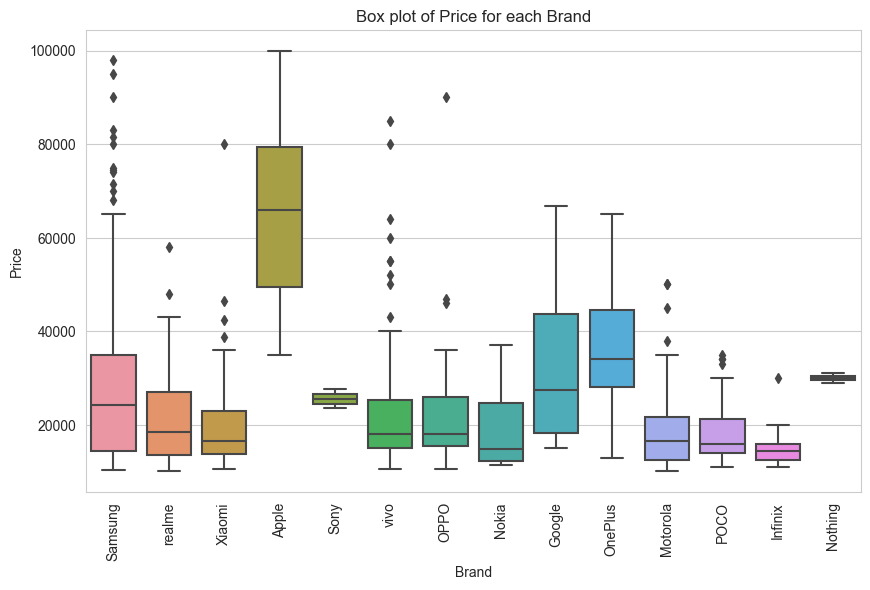

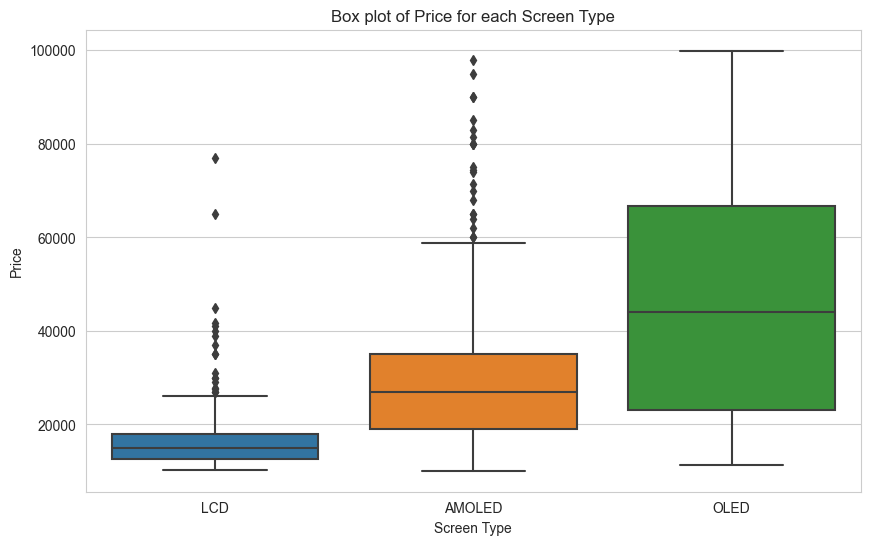

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert OpSys to numerical
df['OpSys_num'] = df['OpSys'].str.extract('(\d+)').astype(float)

# Calculate correlation with price
correlation = df[['OpSys_num', 'Price']].corr().iloc[0, 1]
print(f'Correlation between OpSys and Price: {correlation}')

# Box plot for Brand and Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Box plot of Price for each Brand')
plt.show()

# Box plot for Screen Type and Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Screen Type', y='Price', data=df)
plt.title('Box plot of Price for each Screen Type')
plt.show()


In this code cell, we are performing some feature engineering on the 'OpSys' column of the dataset. The goal is to convert this categorical variable into a format that can be used by machine learning algorithms, which typically require numerical input.

1. **Drop the 'OpSys_num' column if it exists:** If the 'OpSys_num' column exists in the dataframe from previous operations, it is dropped using the `drop` function.

2. **Split OpSys into type and version number:** The 'OpSys' column, which contains information about the operating system of the smartphone, is split into two separate columns: 'OpSys_type' and 'OpSys_version'. This is done using the `str.split` function with a space (' ') as the delimiter. The `expand=True` argument ensures that the split elements form separate columns in the dataframe.

3. **Convert version number to float:** The 'OpSys_version' column, which contains the version number of the operating system, is converted to a float data type using the `astype` function. This is done because machine learning algorithms require numerical input.

4. **One-hot encoding for 'OpSys_type':** The 'OpSys_type' column, which contains categorical data (either 'iOS' or 'Android'), is converted into a one-hot encoded format using the `OneHotEncoder` class from the sklearn.preprocessing module. One-hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0. The `drop='first'` argument is used to avoid the dummy variable trap, a scenario where different dummy variables convey the same information.

5. **Create column names for the one-hot encoded variables:** Column names for the one-hot encoded variables are created by appending the category names to 'OpSys_type_'.

6. **Create a dataframe for the one-hot encoded variables:** A new dataframe for the one-hot encoded variables is created using the `DataFrame` constructor.

7. **Reset the index of the original dataframe and the one-hot encoded dataframe:** The index of both dataframes is reset using the `reset_index` function. This is done to ensure that the rows of both dataframes align correctly when they are concatenated.

8. **Add the one-hot encoded variables to the dataframe:** The one-hot encoded dataframe is added to the original dataframe using the `concat` function.

9. **Drop the original 'OpSys' and 'OpSys_type' columns:** Finally, the original 'OpSys' and 'OpSys_type' columns, which are no longer needed, are dropped from the dataframe.

The final dataframe is displayed using the `sample` function to randomly select 20 rows. This allows us to verify that the operations have been performed correctly.


In [13]:
from sklearn.preprocessing import OneHotEncoder

if 'OpSys_num' in df.columns:
    df = df.drop(['OpSys_num'], axis=1)

df[['OpSys_type', 'OpSys_version']] = df['OpSys'].str.split(' ', expand=True)

df['OpSys_version'] = df['OpSys_version'].astype(float)

onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(df[['OpSys_type']])

columns = ['OpSys_type_' + cat for cat in onehot_encoder.categories_[0][1:]]

onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=columns)

df = df.reset_index(drop=True)
onehot_encoded_df = onehot_encoded_df.reset_index(drop=True)

df = pd.concat([df, onehot_encoded_df], axis=1)

df = df.drop(['OpSys', 'OpSys_type'], axis=1)

df.sample(20)

C:\Users\Shreyansh Rai\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Brand  Price  Weight  Screen Size  PPI Screen Type  Refresh Rate  RAM   
309  Samsung  38999   163.0         6.20  566      AMOLED           120    8  \
28     Apple  89999   140.0         5.40  477        OLED            60    4   
488     vivo  54999   206.0         6.78  388      AMOLED           120    8   
382  Samsung  16186   215.0         6.60  400         LCD           120    6   
75    realme  29999   179.0         6.43  409      AMOLED           120   12   
548     vivo  19999   163.7         6.30  400         LCD            60    6   
652     vivo  12999   184.0         6.58  401         LCD            60    4   
612   Xiaomi  32334   196.0         6.67  395      AMOLED           120    8   
43     Nokia  11699   180.0         6.39  269         LCD            60    6   
380   realme  26999   194.5         6.62  398      AMOLED           120    8   
566  OnePlus  43999   189.0         6.55  402      AMOLED           120   12   
353   Xiaomi  28999   204.0         6.67  395      AMOLED           120    8   
543     OPPO  10489   177.0         6.52  269         LCD            60    4   
296     OPPO  16994   172.0         6.43  409      AMOLED            60    8   
214  Samsung  11399   192.0         6.40  403      AMOLED            60    4   
485   realme  18619   199.0         6.60  400         LCD           144    8   
162  Samsung  34999   173.0         6.70  393      AMOLED           120    8   
25    realme  10999   209.0         6.50  270         LCD            60    4   
176  Samsung  22999   187.0         6.70  393      AMOLED            90    6   
54      vivo  11499   182.0         6.51  270         LCD            60    4   

     Memory  NoofCam  MainCamMP  FrontCamMP  Battery  Wireless Ch   
309     128        3         12          10     4000            1  \
28      512        2         12          12     2406            1   
488     128        3         50          32     4500            0   
382     128        4         50           8     6000            0   
75      256        3         64          16     4500            0   
548      64        2         16          25     3315            0   
652     128        2         50           8     5000            0   
612     256        3        108          20     4520            0   
43       64        4         48          16     4000            0   
380     256        3         64          16     5000            0   
566     256        4         48          16     4500            0   
353     128        3        108          16     5000            0   
543      64        3         13           8     4230            0   
296     128        4         48          16     4310            0   
214      64        3         48          20     6000            0   
485     128        3         48          16     5000            0   
162     128        3         64          32     5000            0   
25      128        3         13           8     6000            0   
176     128        3         64          32     4500            0   
54       64        2         13           8     5000            0   

     Fast Charging  Fingerprint  Dual SIM  Age  Resolution X  Resolution Y   
309              1            1         1   41          1440          3200  \
28               1            0         1   21          1080          2340   
488              1            1         1   13          1080          2400   
382              1            1         1   14          1080          2408   
75               1            1         1   24          1080          2400   
548              1            1         1   58          1080          2280   
652              1            1         1    2          1080          2408   
612              1            1         1   27          1080          2400   
43               0            1         1   28           720          1560   
380              1            1         1    9          1080          2400   
566              1

In this code cell, we are performing additional feature engineering on the 'Screen Type' column of the dataset. The goal is to convert this categorical variable into a format that can be used by machine learning algorithms, which typically require numerical input.

1. **Drop the 'OpSys_type_iOS' column:** The 'OpSys_type_iOS' column is dropped from the dataframe using the `drop` function. This is because we realized that the operating system will always be 'iOS' when the brand is 'Apple' and 'Android' in all other cases. Therefore, this feature is not needed.

2. **One-hot encoding for 'Screen Type':** The 'Screen Type' column, which contains categorical data (either 'LCD', 'AMOLED', or 'OLED'), is converted into a one-hot encoded format using the `OneHotEncoder` class from the sklearn.preprocessing module. One-hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0. The `drop='first'` argument is used to avoid the dummy variable trap, a scenario where different dummy variables convey the same information.

3. **Create column names for the one-hot encoded variables:** Column names for the one-hot encoded variables are created by appending the category names to 'ScreenType_'.

4. **Create a dataframe for the one-hot encoded variables:** A new dataframe for the one-hot encoded variables is created using the `DataFrame` constructor.

5. **Reset the index of the original dataframe and the one-hot encoded dataframe:** The index of both dataframes is reset using the `reset_index` function. This is done to ensure that the rows of both dataframes align correctly when they are concatenated.

6. **Add the one-hot encoded variables to the dataframe:** The one-hot encoded dataframe is added to the original dataframe using the `concat` function.

7. **Drop the original 'Screen Type' column:** Finally, the original 'Screen Type' column, which is no longer needed, is dropped from the dataframe.

The final dataframe is not displayed in this code cell, but it now includes one-hot encoded variables for the 'Screen Type' feature and no longer includes the original 'Screen Type' or 'OpSys_type_iOS' columns.


In [14]:
from sklearn.preprocessing import OneHotEncoder

df = df.drop(['OpSys_type_iOS'], axis=1)

onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(df[['Screen Type']])

columns = ['ScreenType_' + cat for cat in onehot_encoder.categories_[0][1:]]

onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=columns)

df = df.reset_index(drop=True)
onehot_encoded_df = onehot_encoded_df.reset_index(drop=True)

df = pd.concat([df, onehot_encoded_df], axis=1)

df = df.drop(['Screen Type'], axis=1)

C:\Users\Shreyansh Rai\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In this code cell, we are performing target mean encoding on the 'Brand' column of the dataset. The goal is to convert this categorical variable into a format that can be used by machine learning algorithms, which typically require numerical input.

1. **Target mean encoding for 'Brand':** The 'Brand' column, which contains categorical data, is converted into a target mean encoded format using the `TargetEncoder` class from the category_encoders module. Target mean encoding is a process of replacing a categorical value with the mean value of the target variable. In this case, we are replacing each brand name with the average price of phones of that particular brand. The `smoothing` parameter is set to 0.1 to control the balance between the mean of the target variable and the value of the category. This helps to prevent overfitting.

2. **Drop the original 'Brand' column:** Finally, the original 'Brand' column, which is no longer needed, is dropped from the dataframe.

The final dataframe is displayed using the `sample` function, which returns a random sample of items from the dataframe. It now includes a 'Brand_encoded' column and no longer includes the original 'Brand' column.


In [15]:
import category_encoders as ce

target_encoder = ce.TargetEncoder(smoothing=0.1)
df['Brand_encoded'] = target_encoder.fit_transform(df['Brand'], df['Price'])

df = df.drop(['Brand'], axis=1)
df.sample(20)

Price  Weight  Screen Size  PPI  Refresh Rate  RAM  Memory  NoofCam   
183  21699   173.0         6.60  399           120    8     128        3  \
99   14999   207.0         6.95  258            60    4      64        3   
338  34999   186.0         6.70  394           120    8     128        3   
265  10699   189.0         6.60  400            60    4     128        3   
258  17990   157.0         6.55  402            90    6     128        3   
595  19998   191.0         6.39  403            60    6     128        3   
388  24999   199.0         6.60  390           120    8     128        3   
169  27999   185.0         6.41  402            60    8     128        2   
527  17999   182.0         6.40  403            60    4      64        4   
517  24999   155.0         6.50  405           144    8     128        3   
481  34999   196.0         6.70  393           144    8     128        3   
569  15000   163.5         6.22  270            60    4      64        2   
359  16999   186.0         6.67  395           120    6     128        3   
318  16999   172.0         6.44  409            60    8     128        3   
373  23999   173.0         6.43  409            90    6     128        3   
455  14999   186.0         6.70  393            60    6      64        2   
11   15990   189.6         6.38  404            60    4     128        3   
586  11999   182.0         6.58  401            90    4     128        3   
235  12999   208.0         6.50  270            60    4      64        3   
148  21990   158.0         6.23  405            60    4      64        1   

     MainCamMP  FrontCamMP  Battery  Wireless Ch  Fast Charging  Fingerprint   
183         50          16     5000            0              1            1  \
99          48          16     5000            0              1            1   
338         50          16     5000            0              1            1   
265         50           8     5000            0              1            1   
258         64          16     4250            0              1            1   
595         48          20     4000            0              1            1   
388         48          13     5000            0              1            1   
169         16          16     3700            0              1            1   
527         64          32     4000            0              1            1   
517         50          32     4020            0              1            1   
481         50          60     4800            1              1            1   
569         13          20     4030            0              0            1   
359         50          13     5000            0              1            1   
318         50          44     4050            0              1            1   
373         64          16     4500            0              1            1   
455         50          16     5000            0              1            1   
11          48          32     4500            0              1            1   
586         50           8     5000            0              1            1   
235         48           8     6000            0              1            1   
148         16          25     3400            0              0            1   

     Dual SIM  Age  Resolution X  Resolution Y  4G  5G  3G  MaxSpeed   
183         1   12          1080          2400   1   1   1      2.20  \
99          1   34           720          1640   1   0   1      2.00   
338         1    9          1080          2412   1   1   1      2.85   
265         1   15          1080          2408   1   0   1      2.00   
258         1   24          1080          2400   1   0   1      2.30   
595         1   48          1080          2340   1   0   1      2.20   
388         1    3          1080          2340   1   1   1      2.60   
169         1   56          1080          2340   1   0   1      2.80   
527         1   43          1080          2340   1   0   1      2.20   
517    

In this code cell, we are performing some final data cleaning steps before moving on to the next phase of the analysis.

1. **Drop the '3G' column:** The '3G' column is dropped from the dataframe. This is because every phone in the dataset supports 3G, so this feature does not provide any useful information for distinguishing between different phones. The key differences lie in whether the phones support 4G or 5G, which are represented by other columns in the dataset.

2. **Print the number of rows and columns in the dataset:** This is a simple check to confirm the current size of the dataframe. It is useful to keep track of this as we manipulate the dataframe, to ensure that our operations are having the expected effects.

3. **Print the total number of missing values in the dataset:** This is another check to ensure the quality of our data. Before moving on to the next phase of the analysis, we want to confirm that there are no missing values left in the dataset that could interfere with our machine learning algorithms.

After these steps, our dataset is clean and ready for the next phase of the analysis.


In [16]:
df = df.drop(['3G'], axis=1)

print("Number of rows and columns in the dataset:", df.shape)
print("Total number of missing values in the dataset:", df.isnull().sum().sum())

Number of rows and columns in the dataset: (656, 28)
Total number of missing values in the dataset: 0


In this code cell, we are performing exploratory data analysis (EDA) on the numerical columns in our dataset. EDA is an important step in the data analysis process because it allows us to understand the distribution of our data, identify outliers, and visualize relationships between variables.

1. **Convert certain columns to integer type:** The 'OpSys_version', 'ScreenType_LCD', and 'ScreenType_OLED' columns are converted to integer type. These columns represent binary (yes/no) data, so it makes sense to store them as integers rather than floats.

2. **List of numerical columns:** We create a list of the names of all numerical columns in our dataset. This list will be used to loop over the columns for creating visualizations.

3. **Box plots for all numerical columns:** For each numerical column, we create a box plot. Box plots are useful for visualizing the distribution of a variable, including its median (the line inside the box), quartiles (the box), and outliers (the points beyond the whiskers). This can help us identify if there are any extreme values or outliers in our data that we might need to handle.

4. **Histograms for all numerical columns:** For each numerical column, we also create a histogram. Histograms show the frequency distribution of a variable, which can help us understand its distribution and identify any skewness.

5. **Scatter plots for all numerical columns against the target variable (Price):** Finally, for each numerical column, we create a scatter plot of the column against the target variable, 'Price'. Scatter plots can help us visualize the relationship between two variables. In this case, we are interested in how each feature relates to the target variable.

After these steps, we have a better understanding of the distribution of our data and the relationships between the features and the target variable.


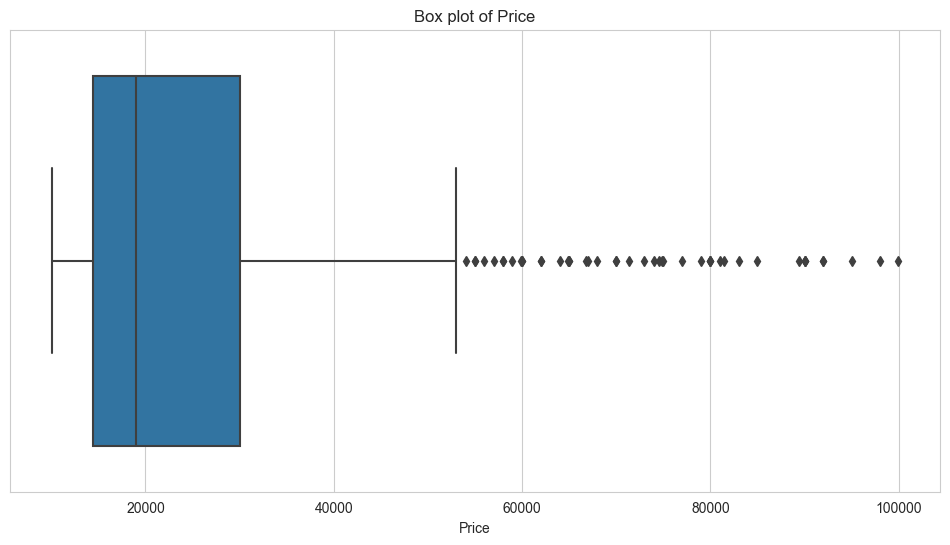

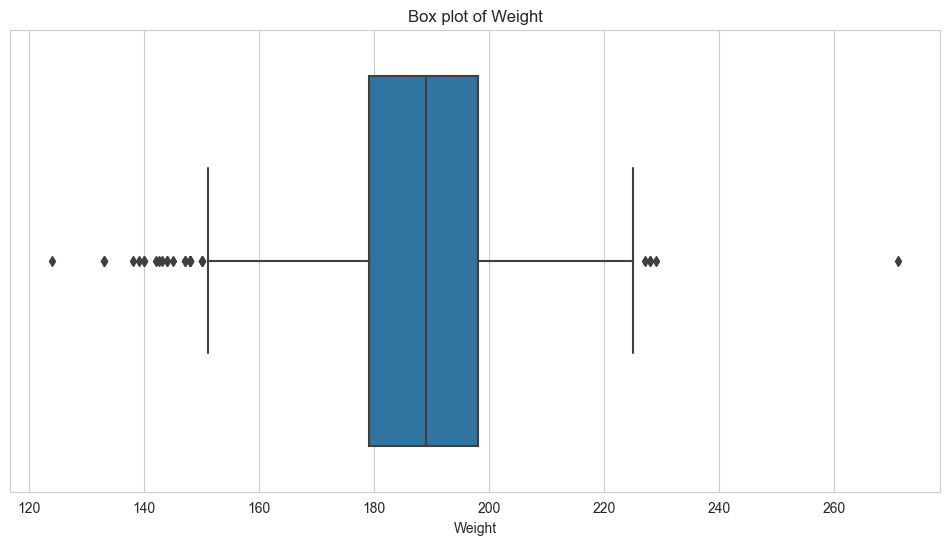

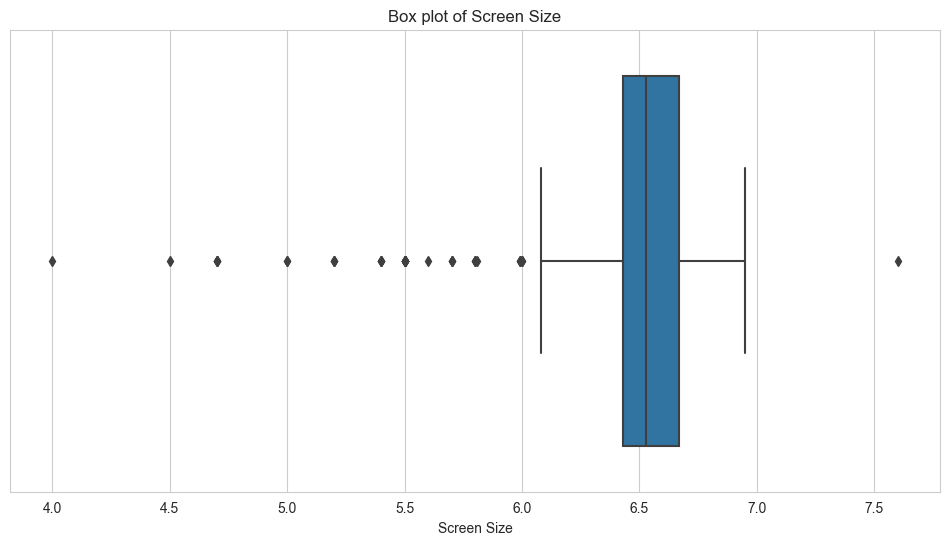

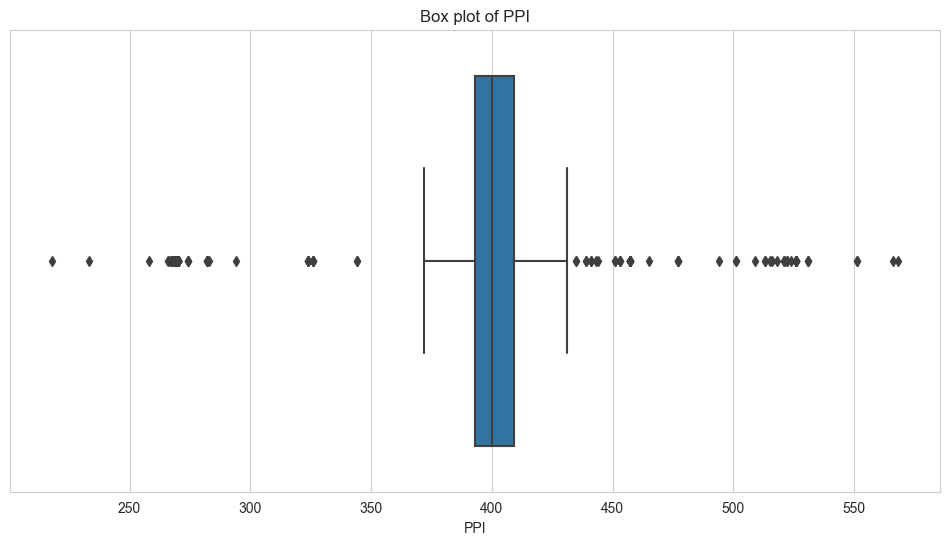

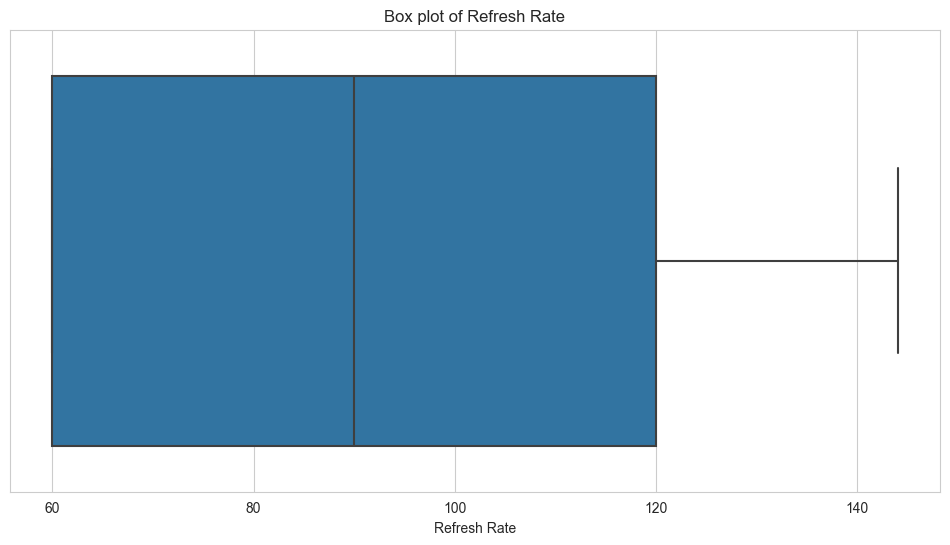

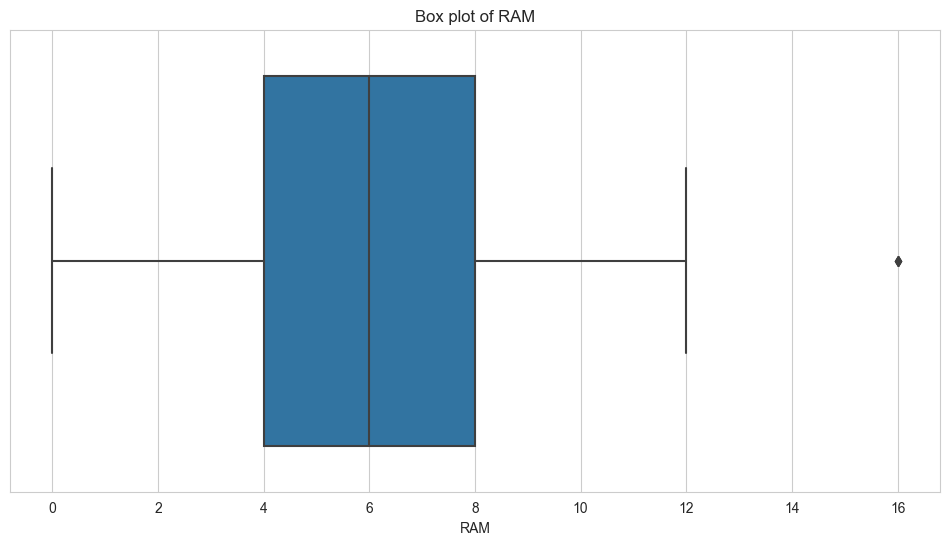

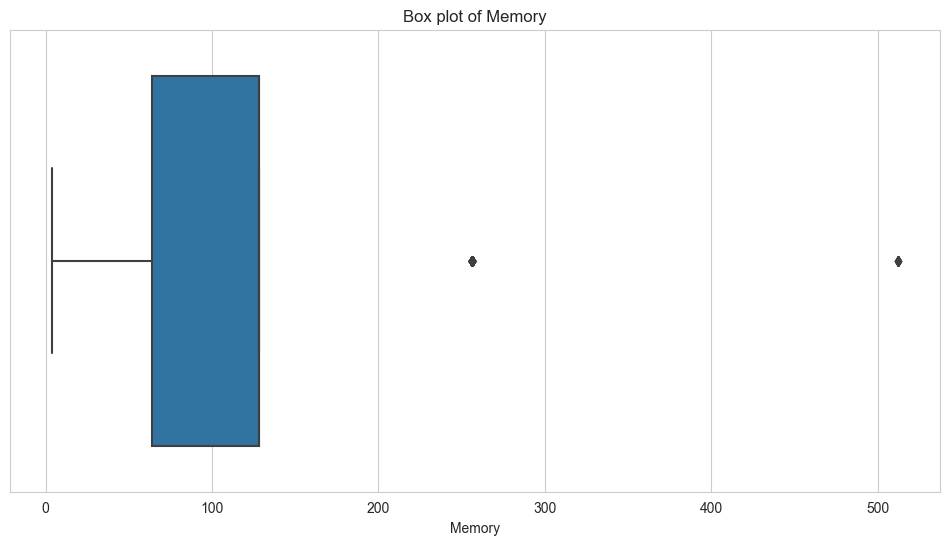

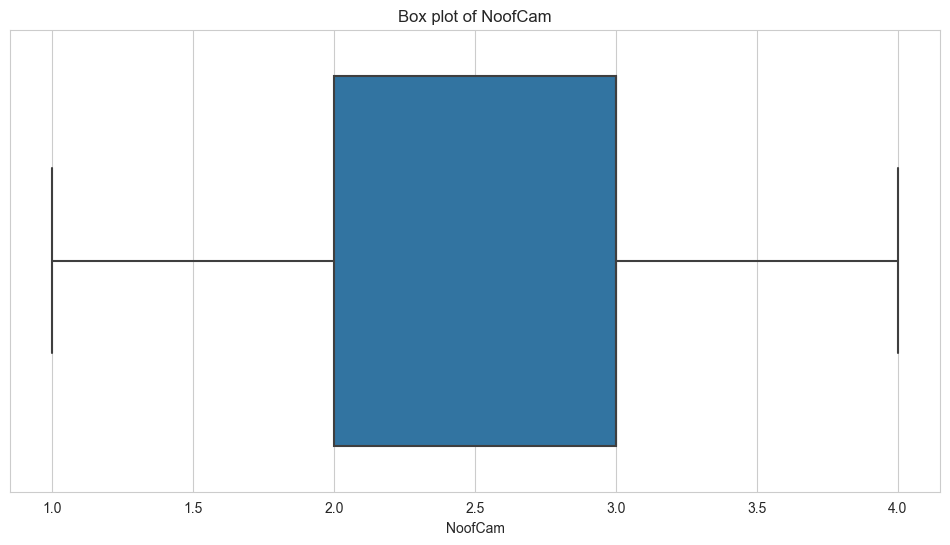

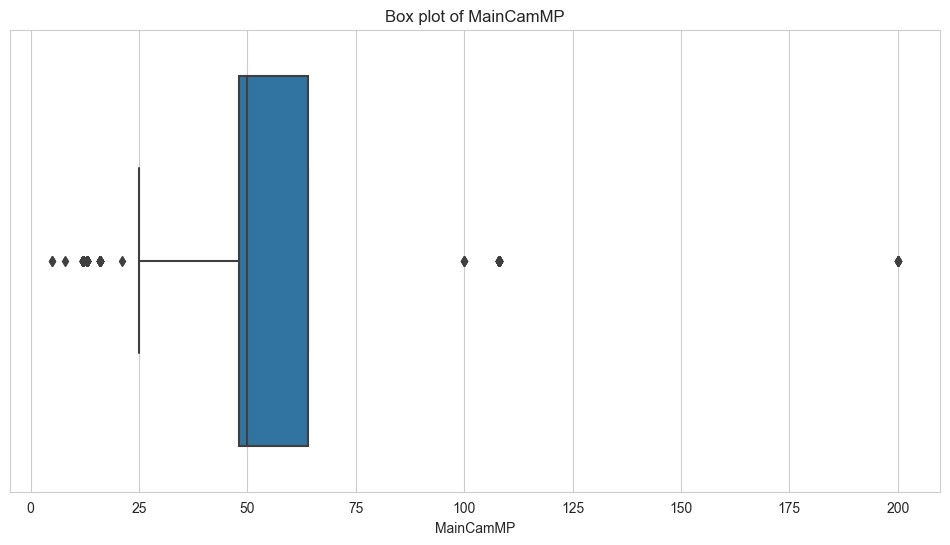

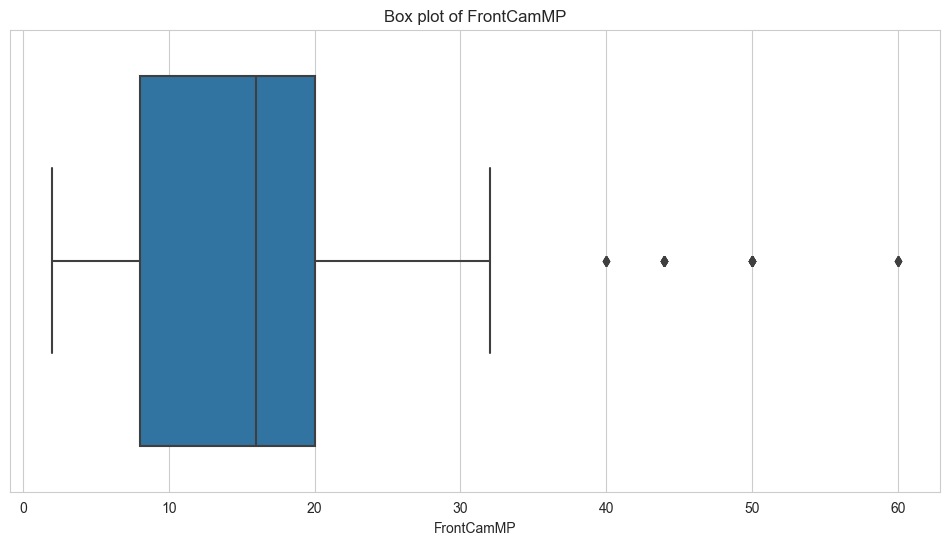

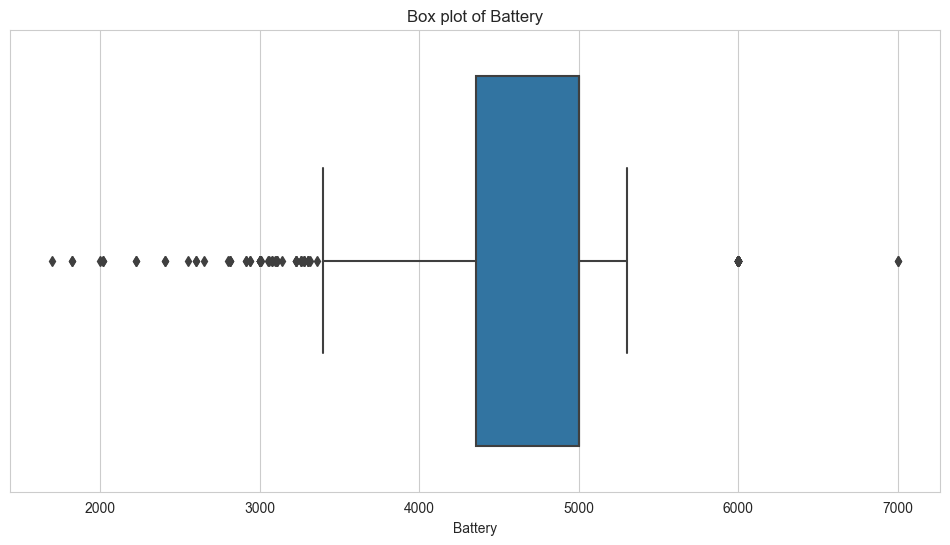

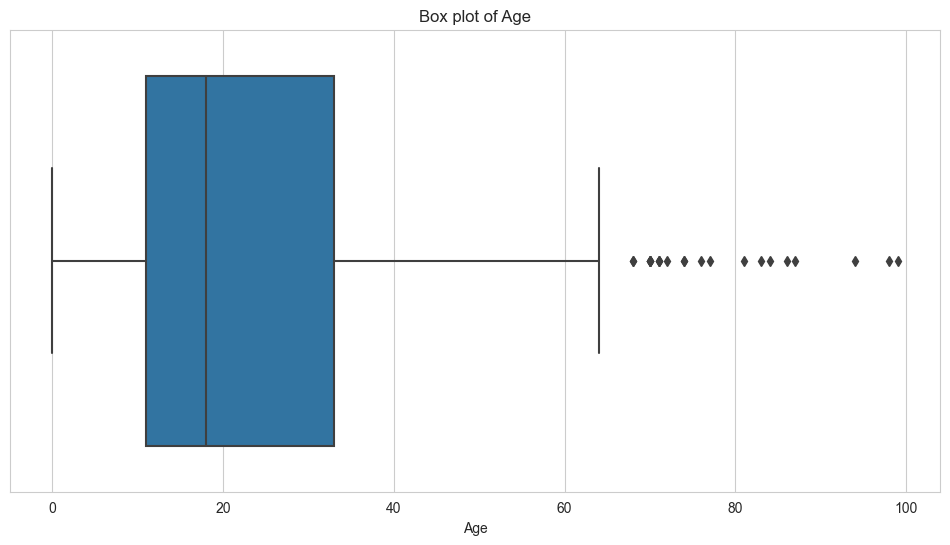

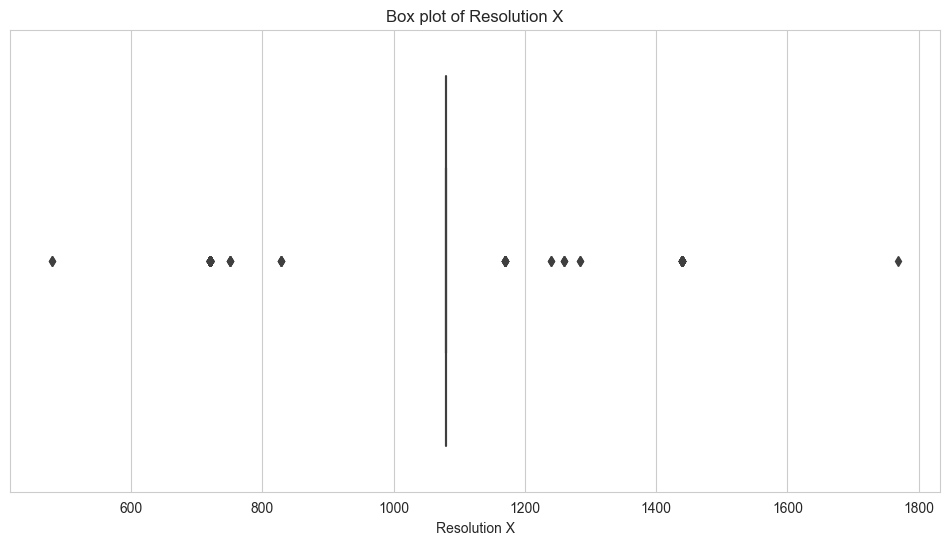

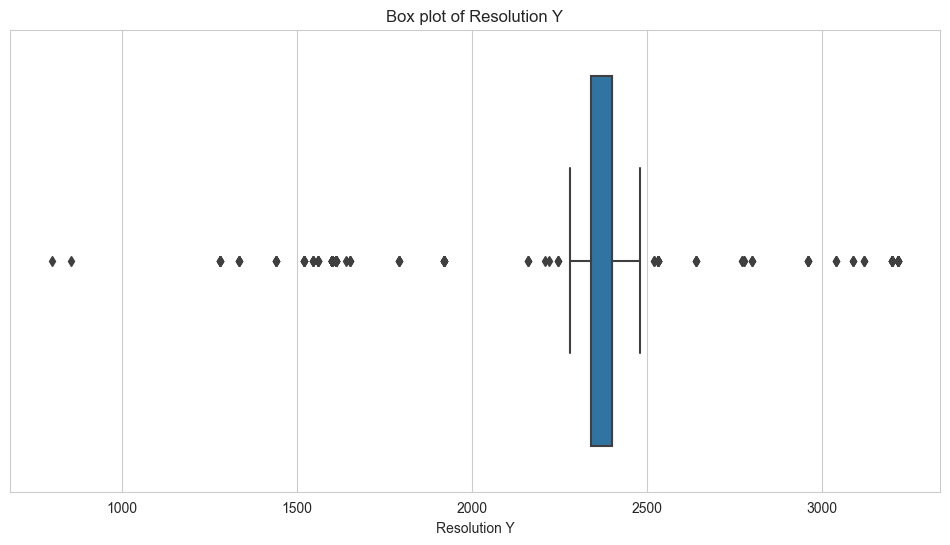

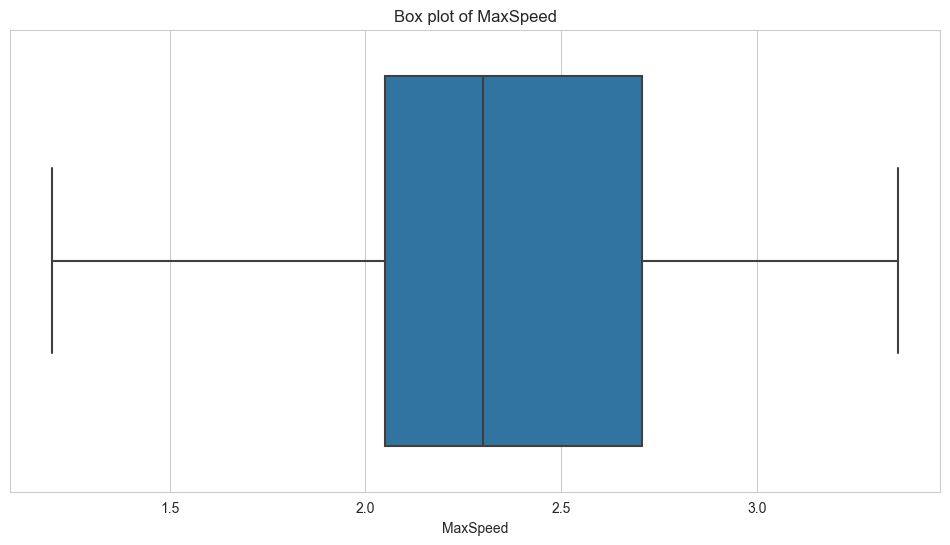

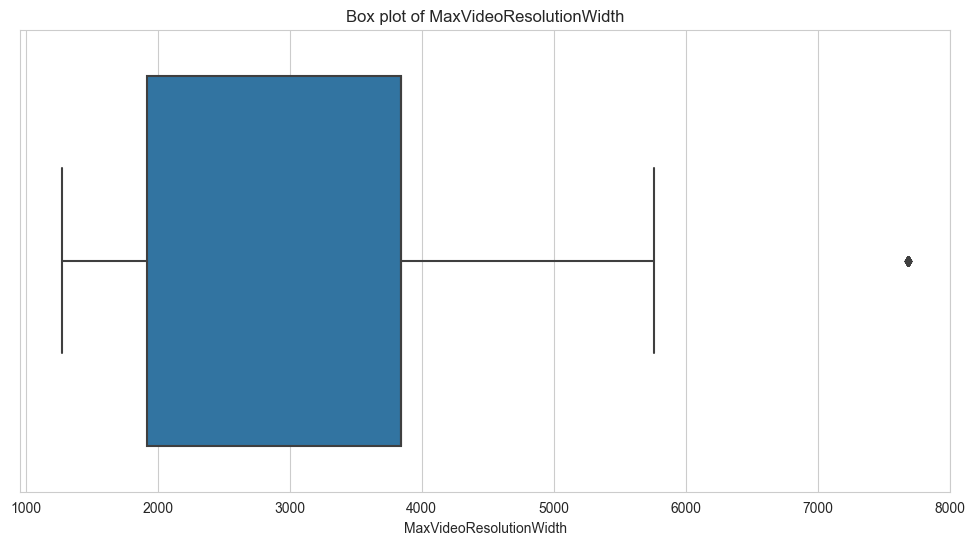

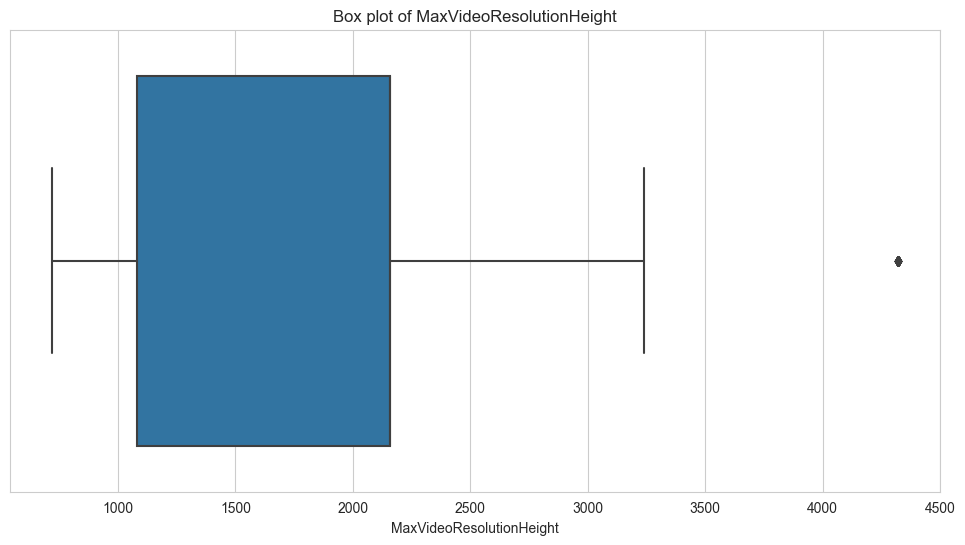

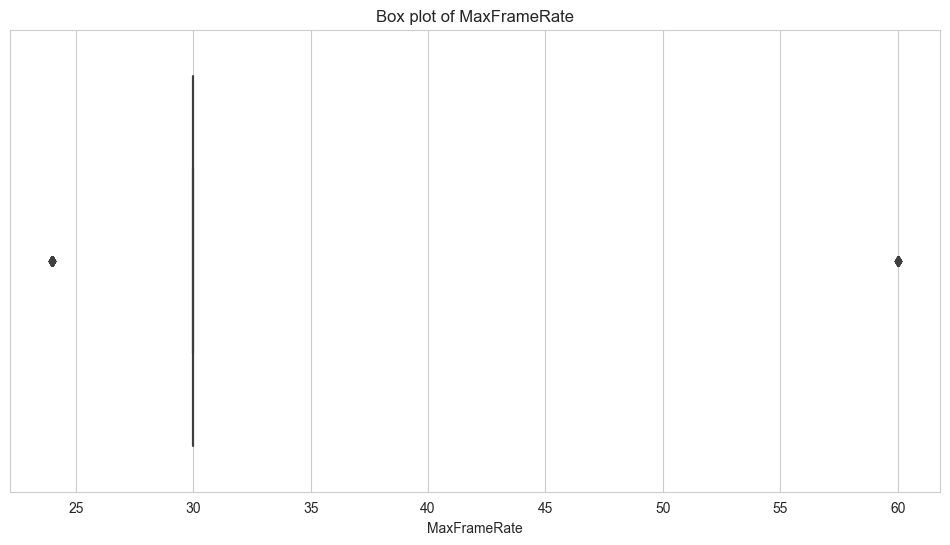

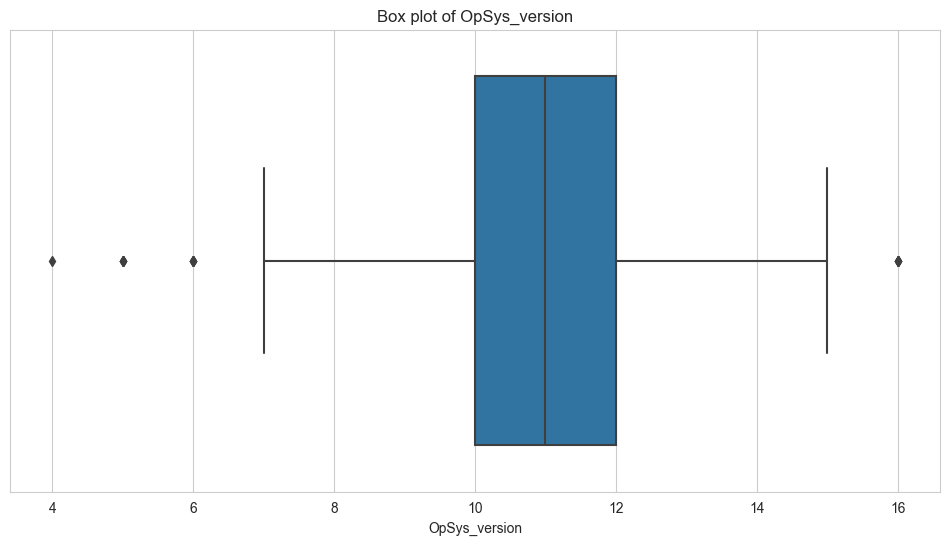

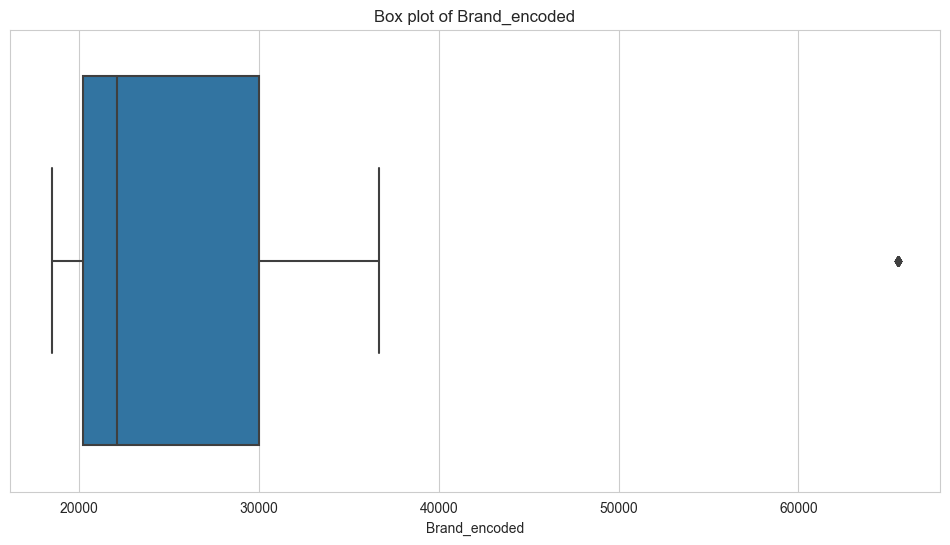

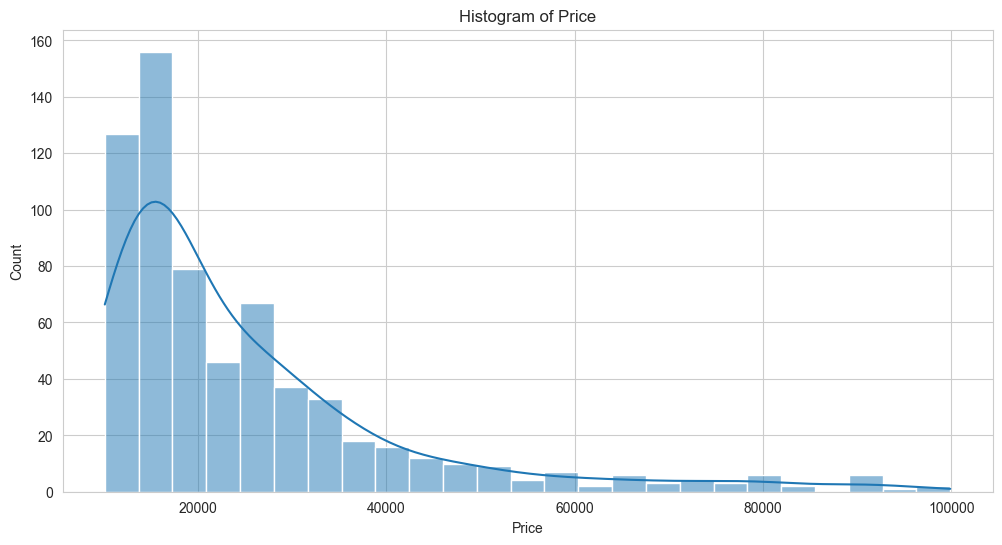

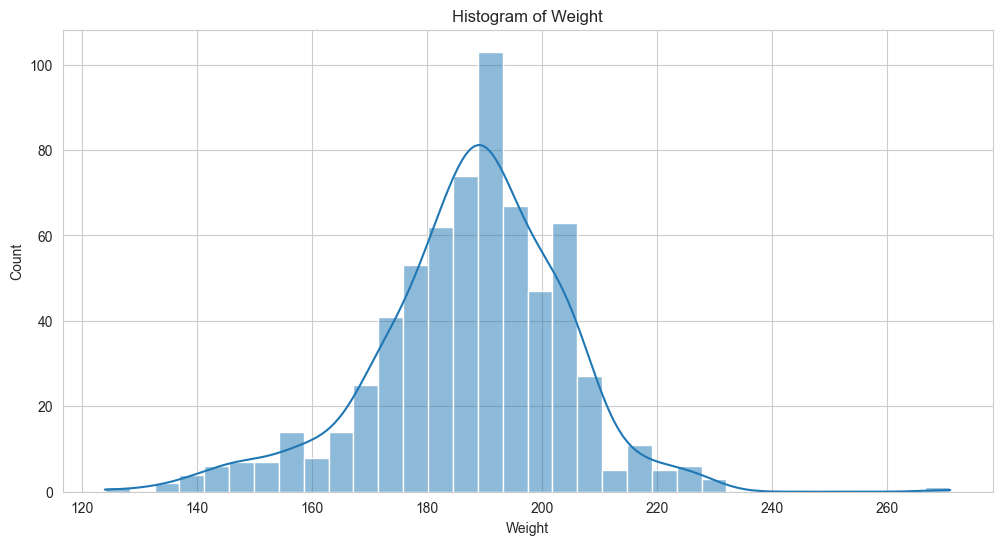

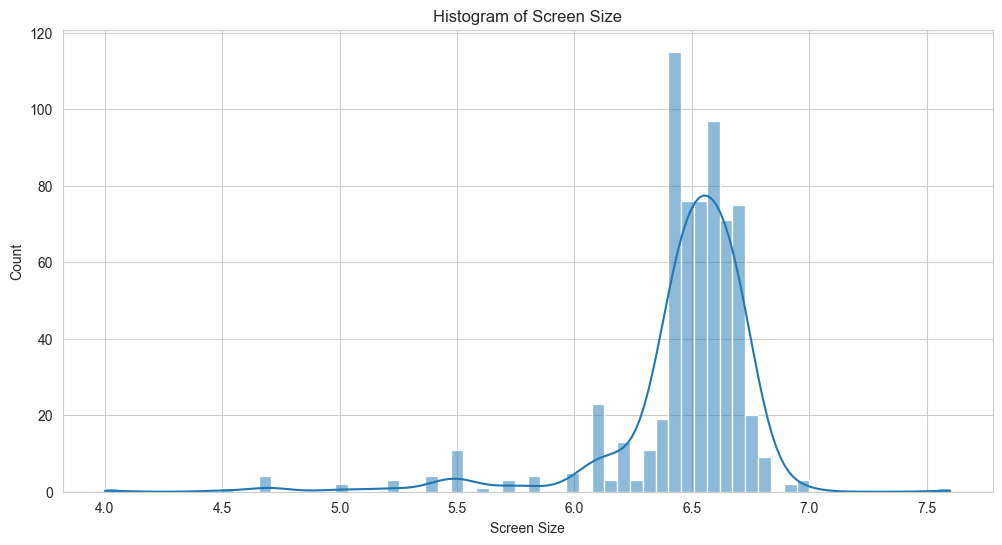

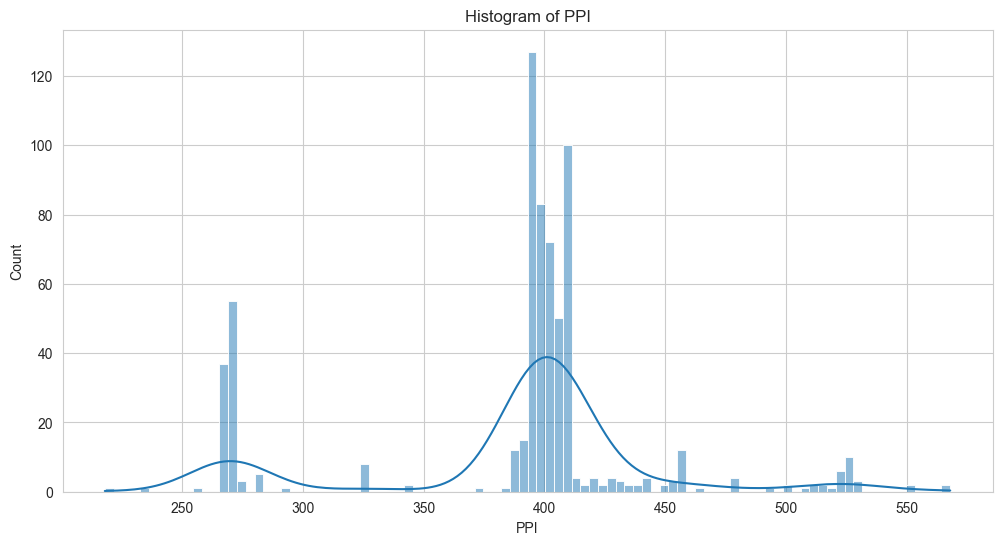

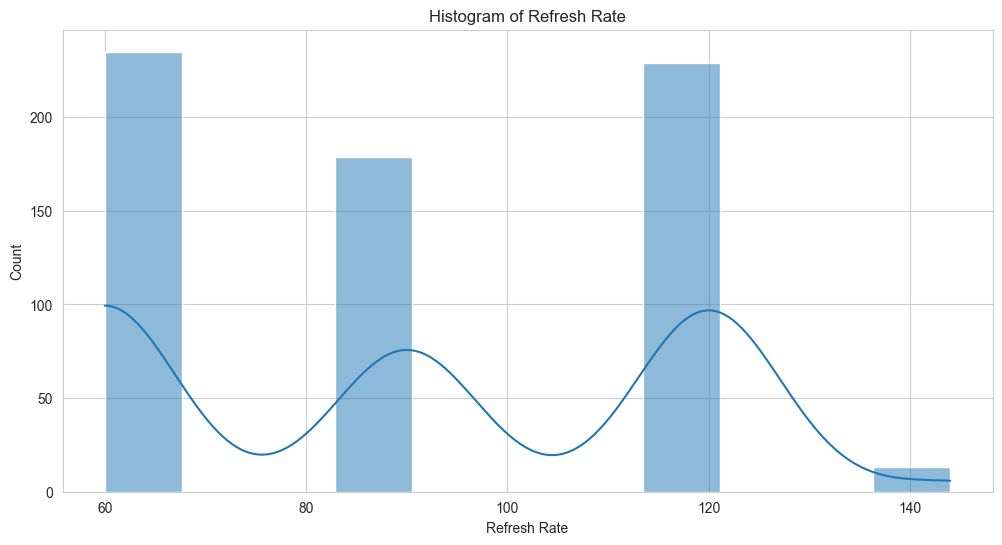

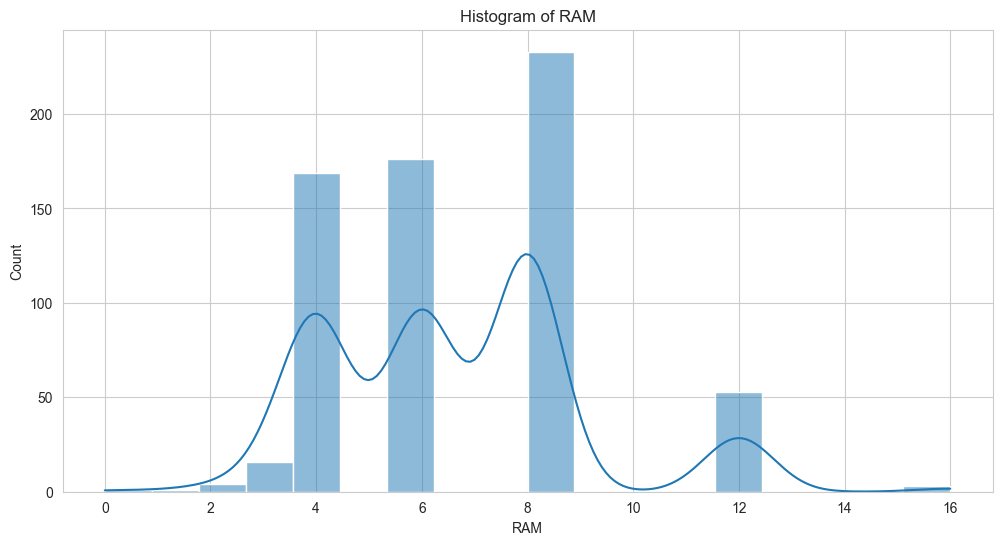

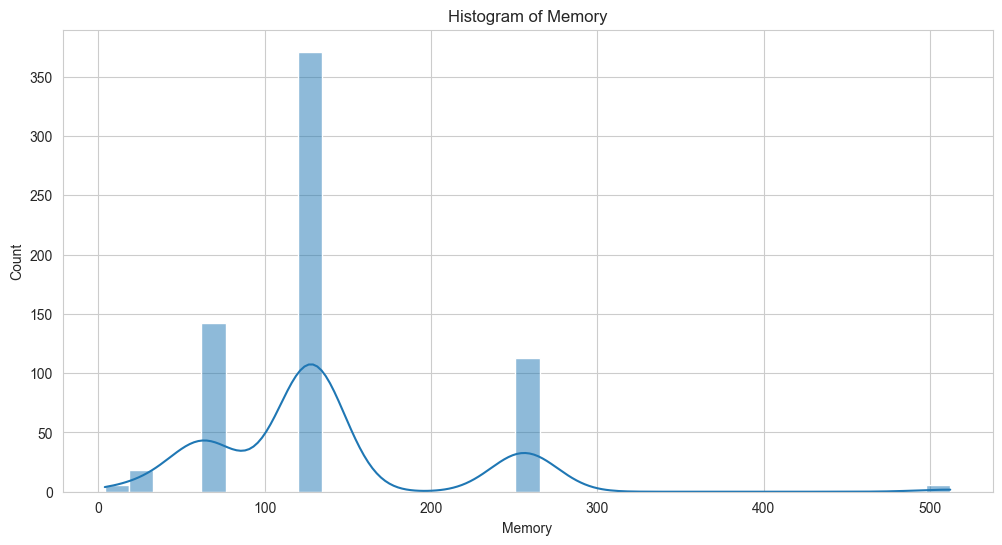

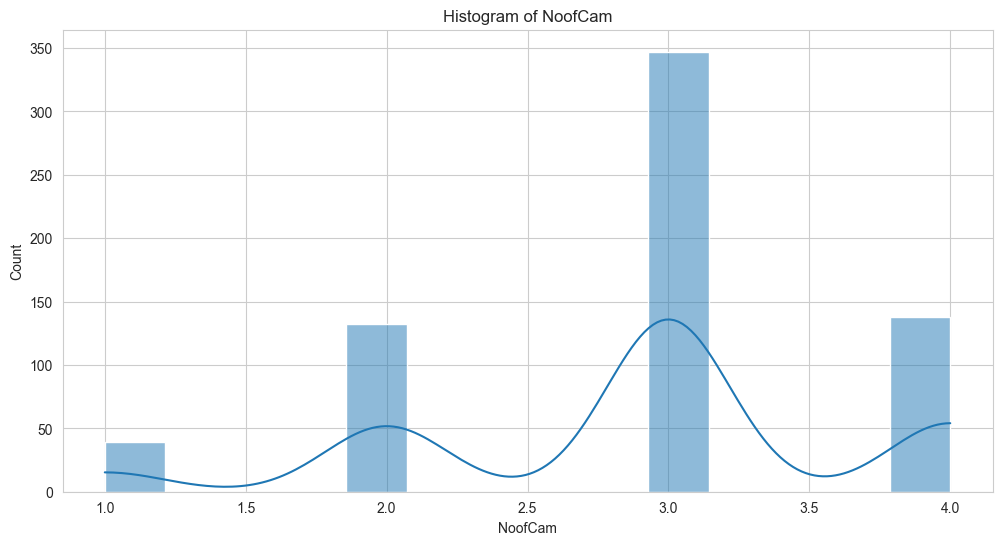

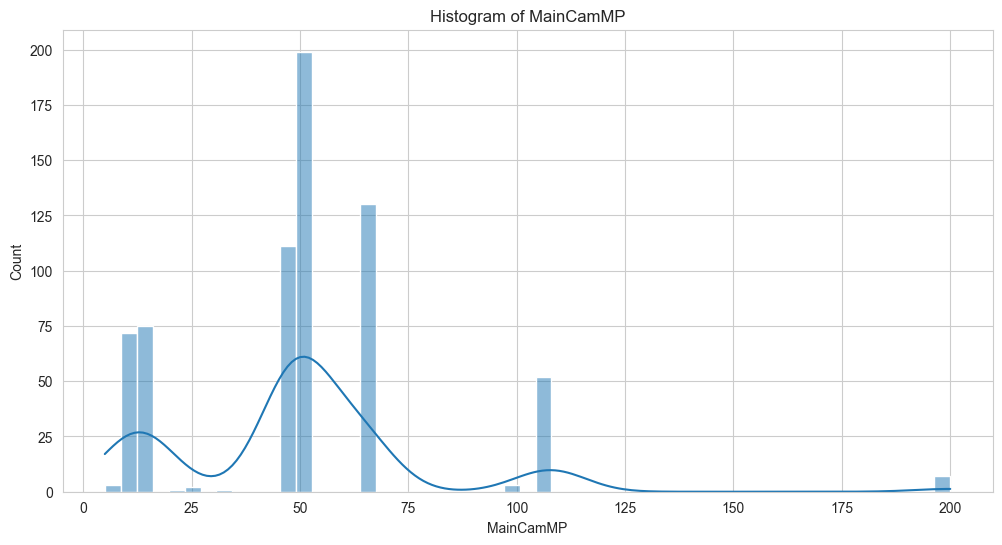

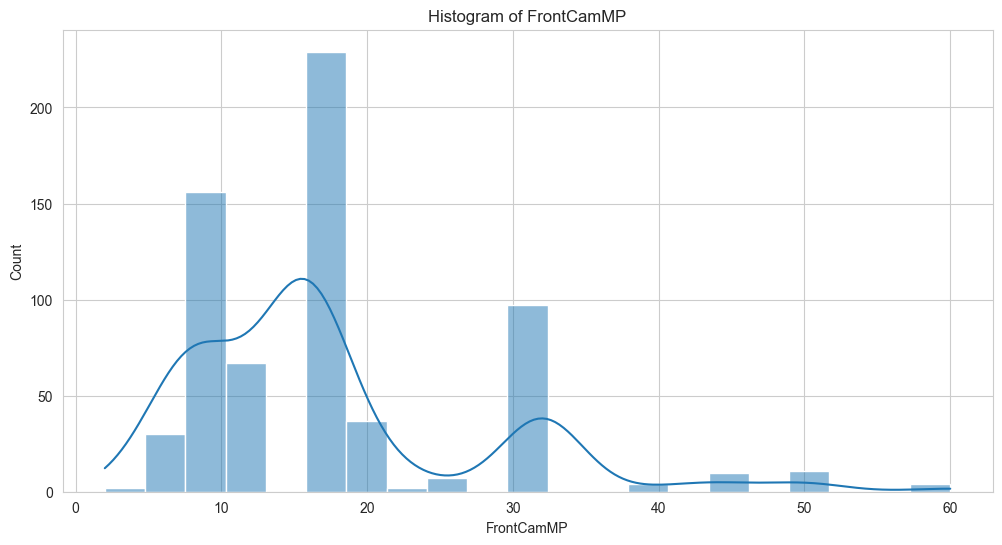

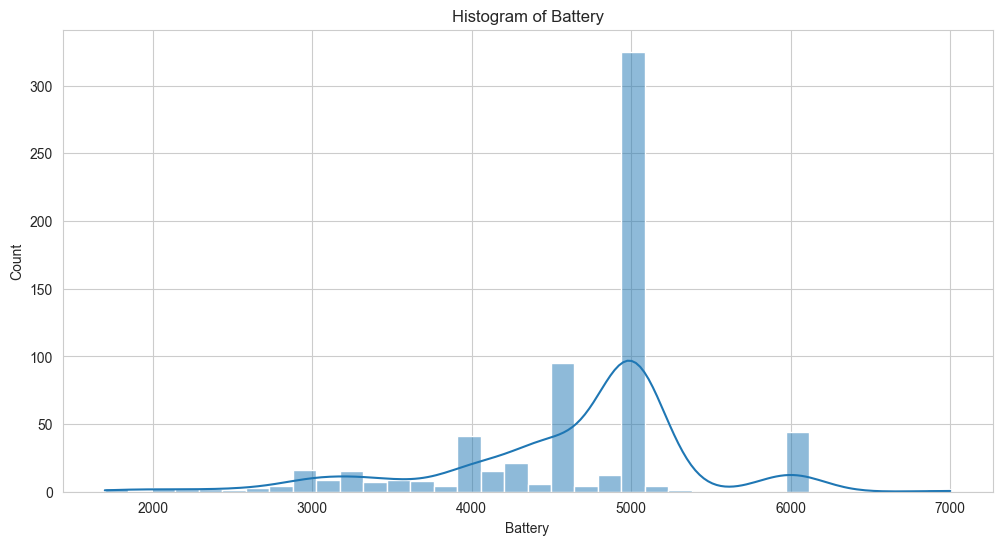

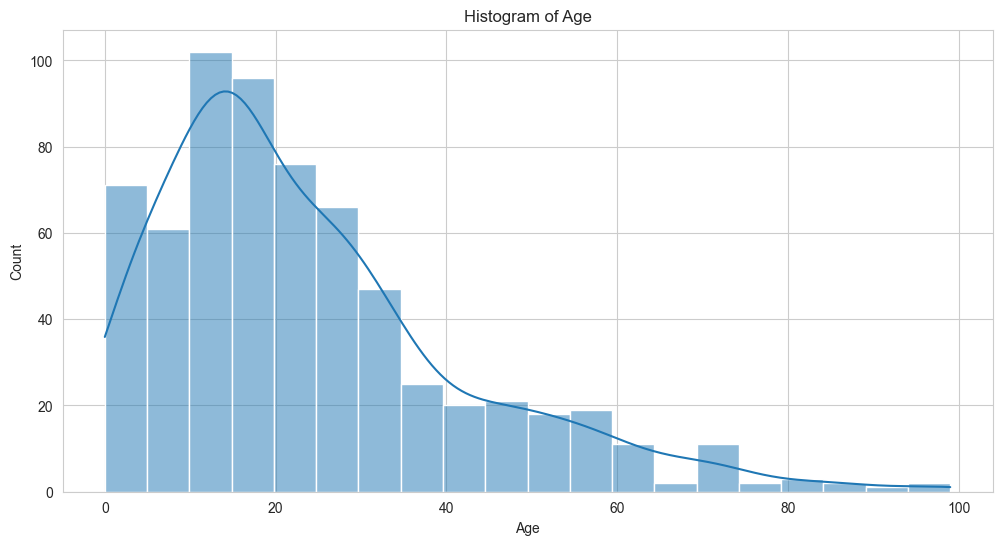

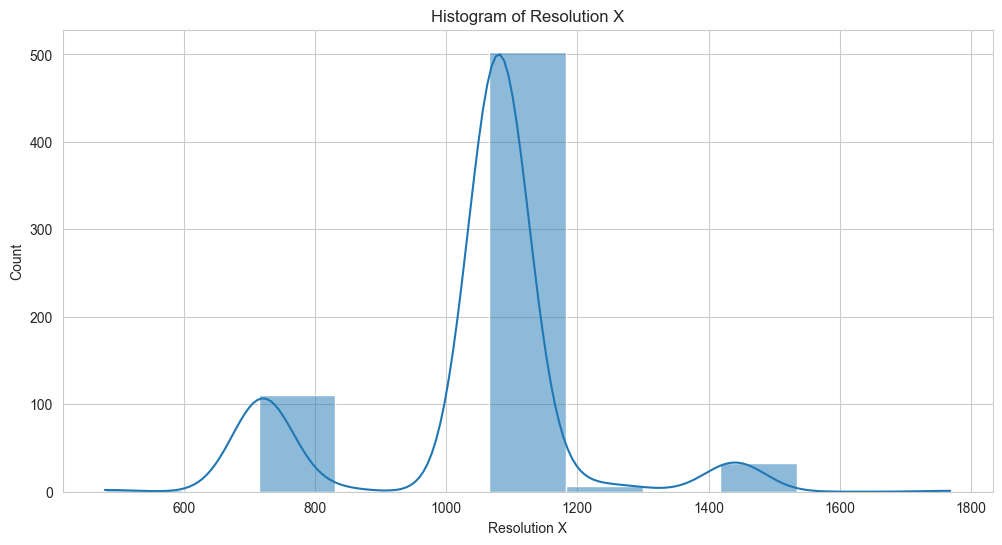

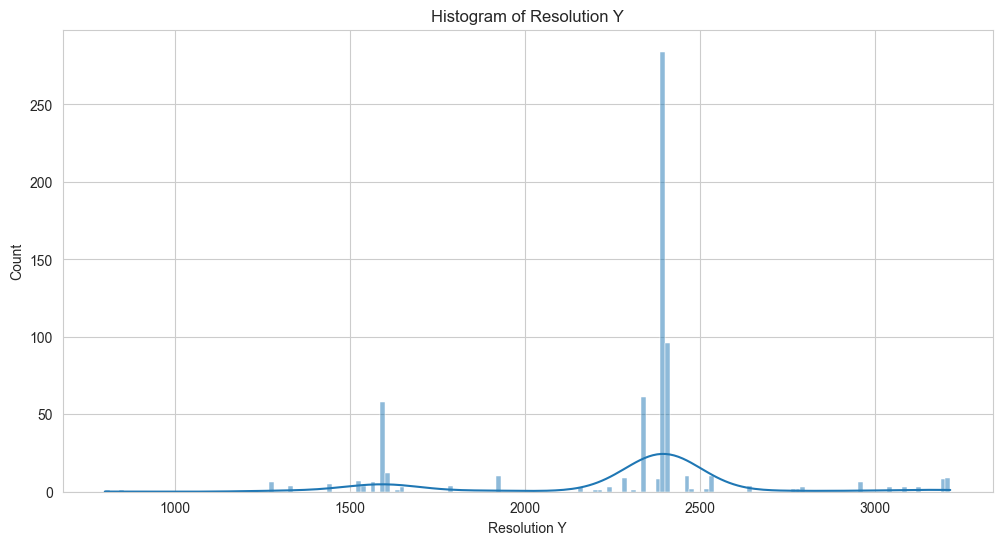

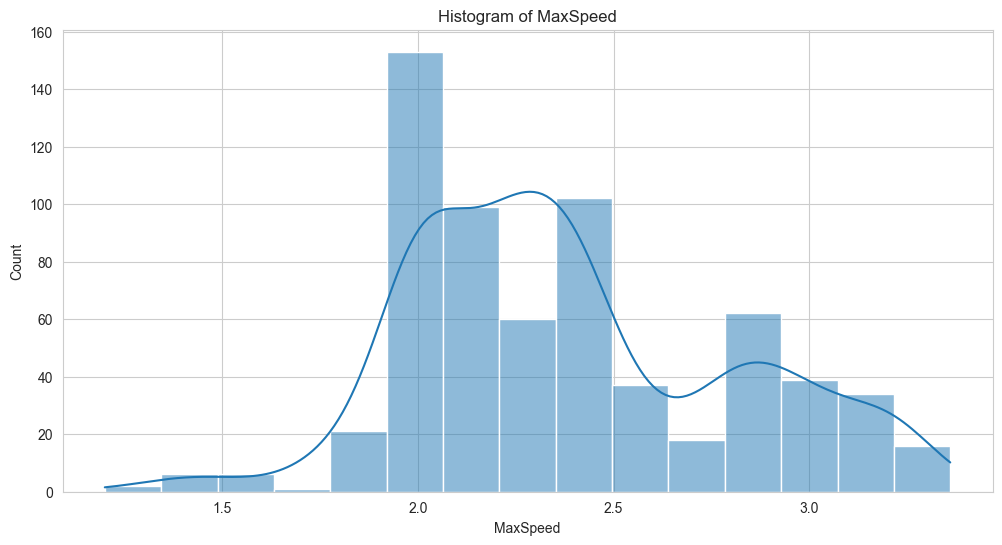

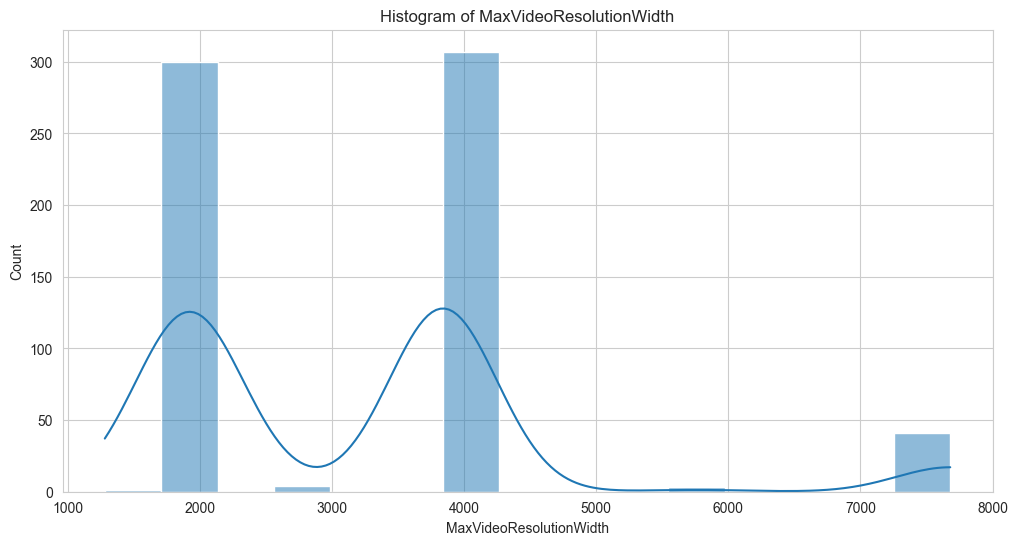

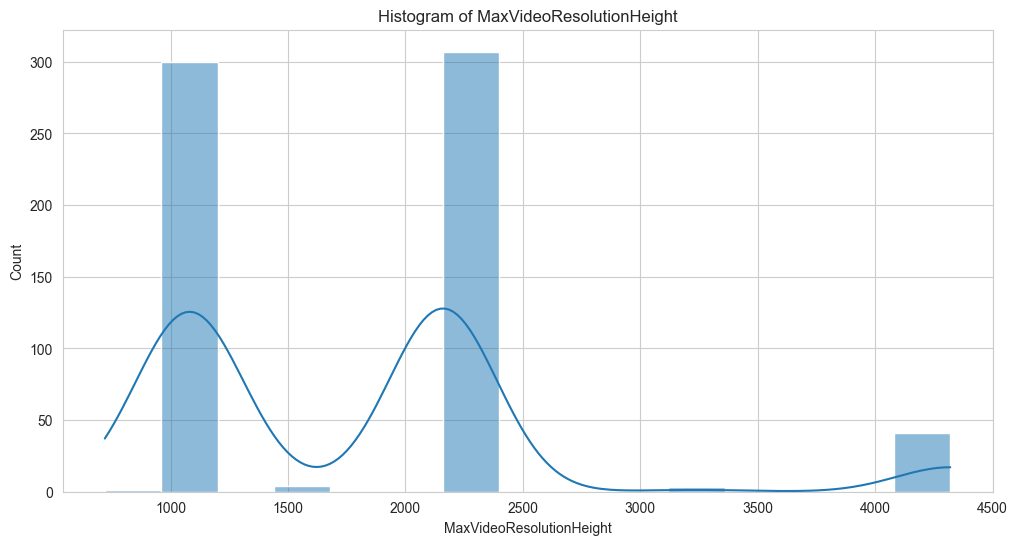

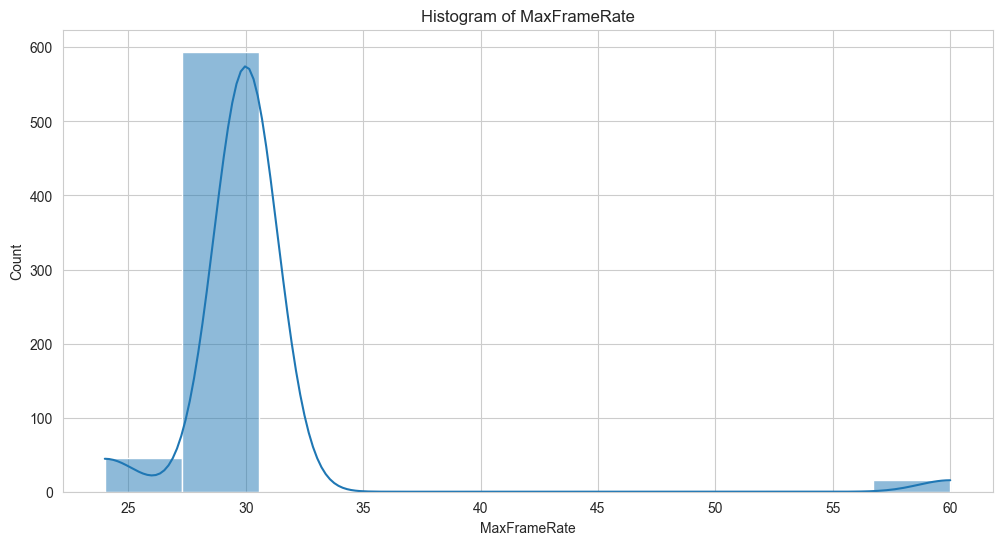

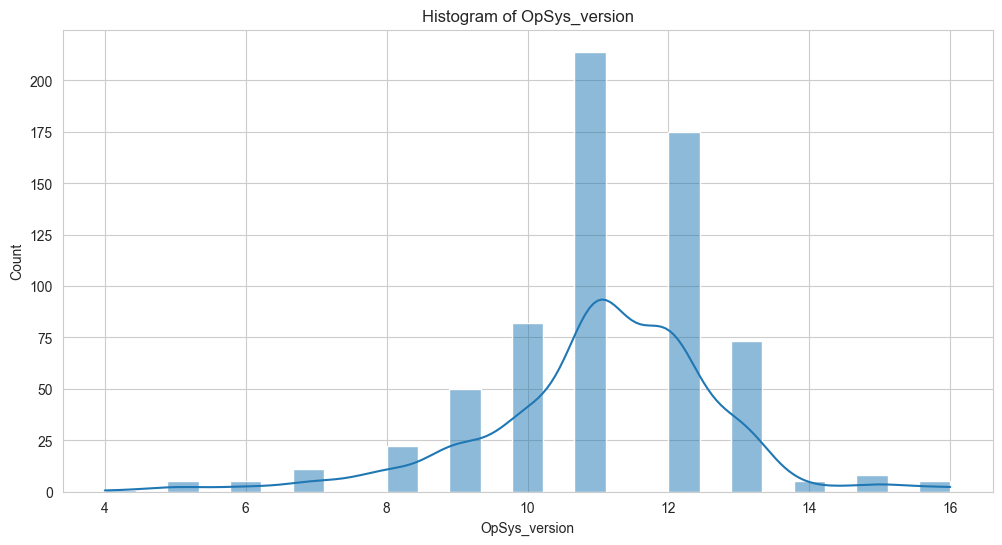

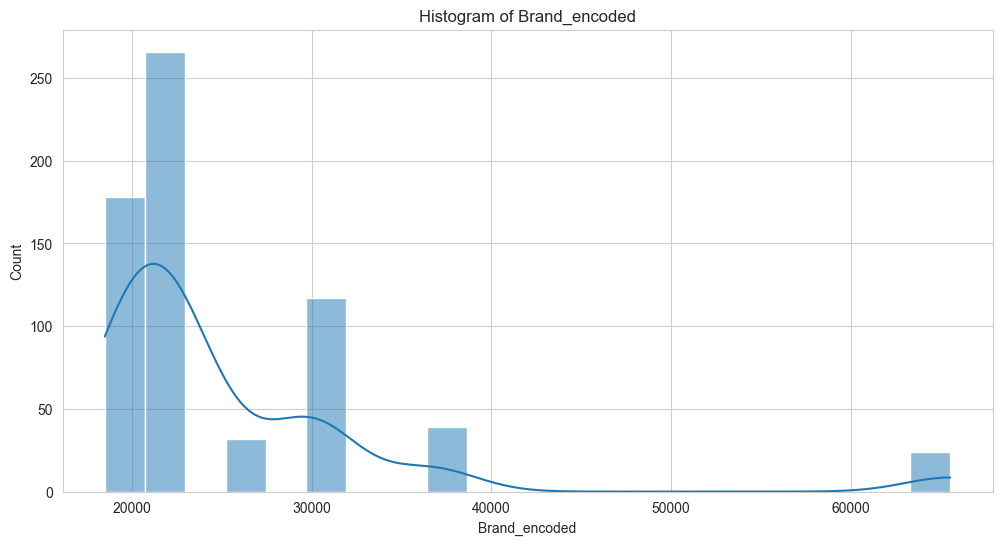

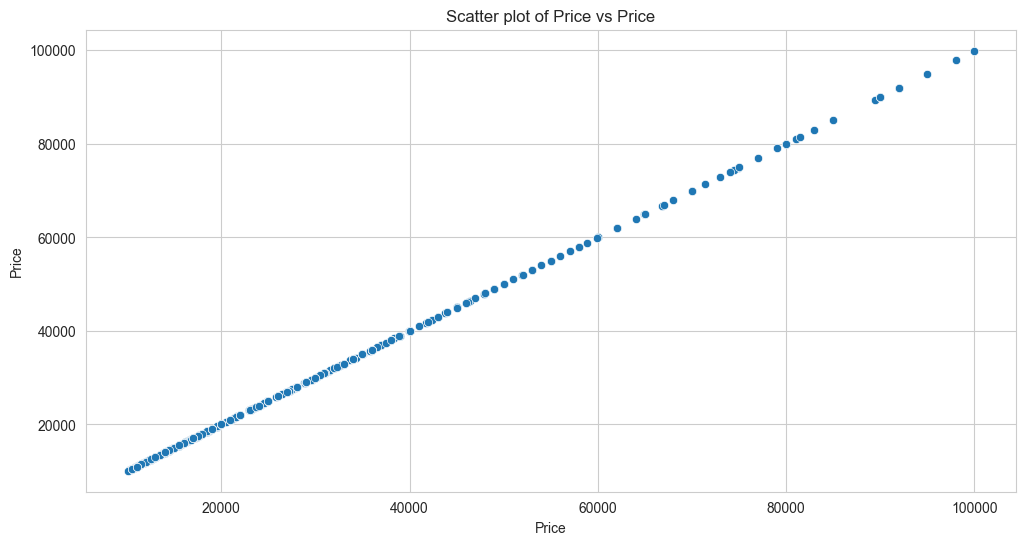

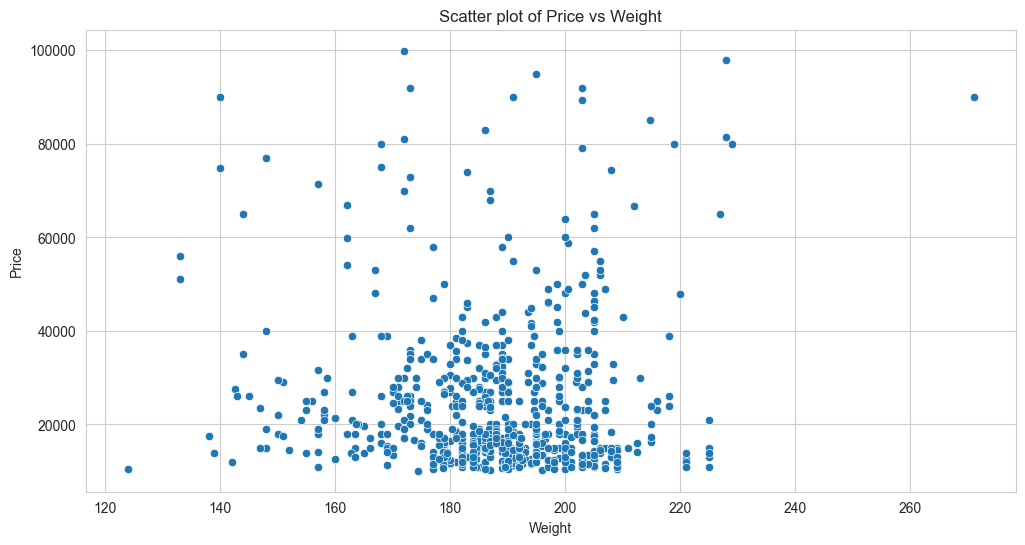

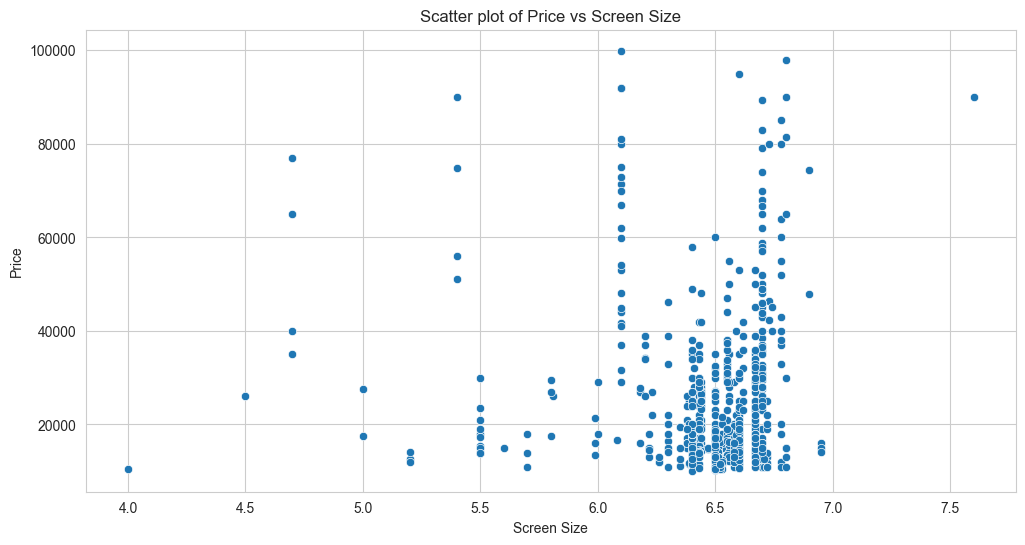

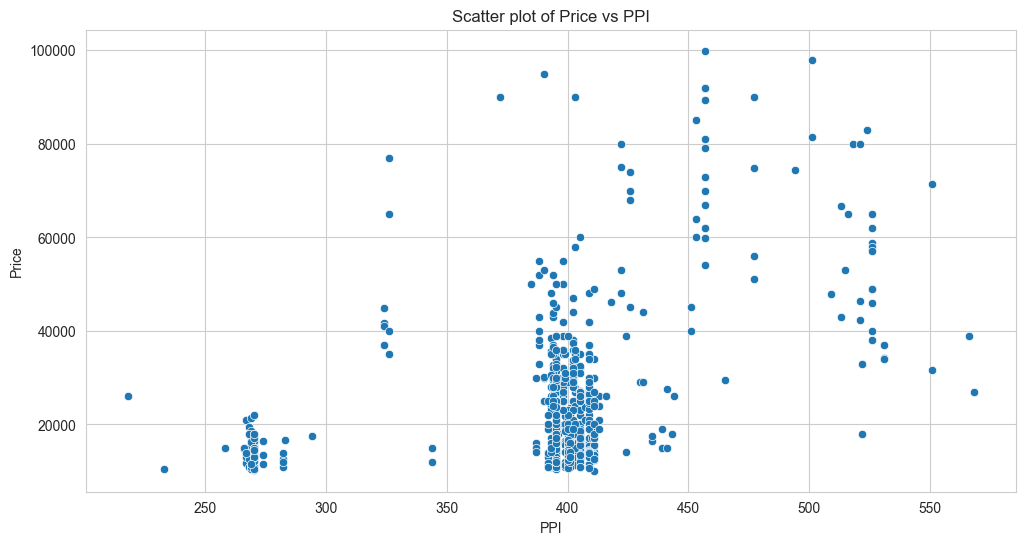

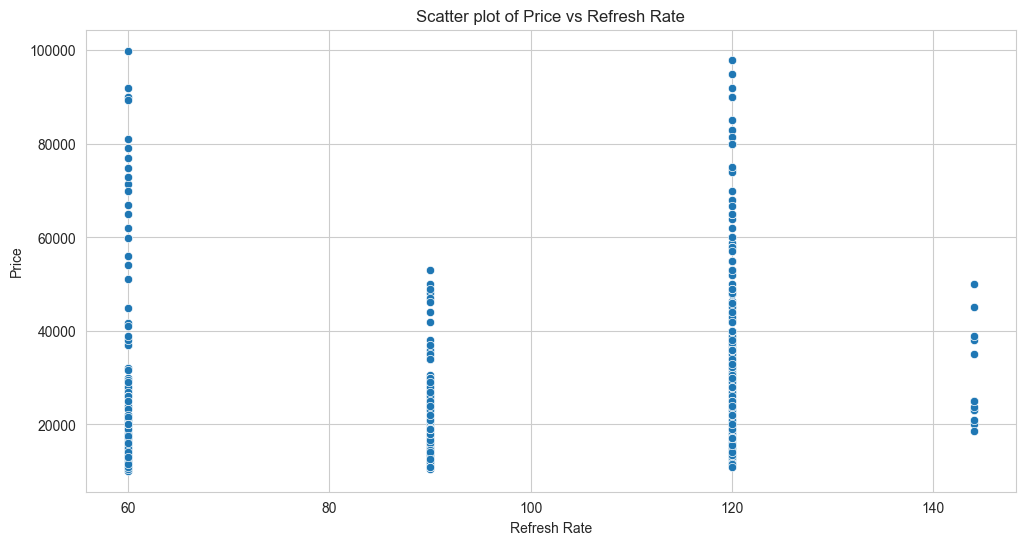

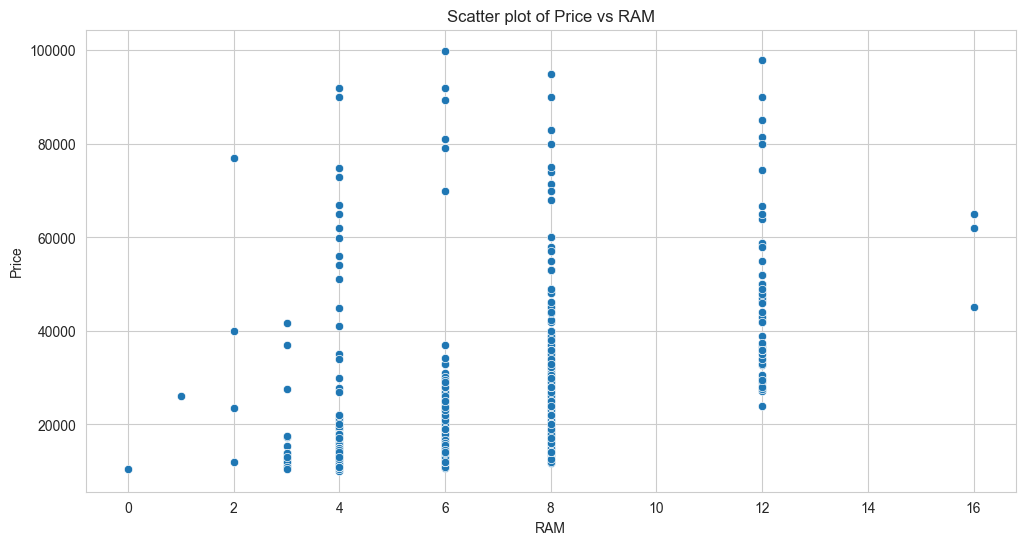

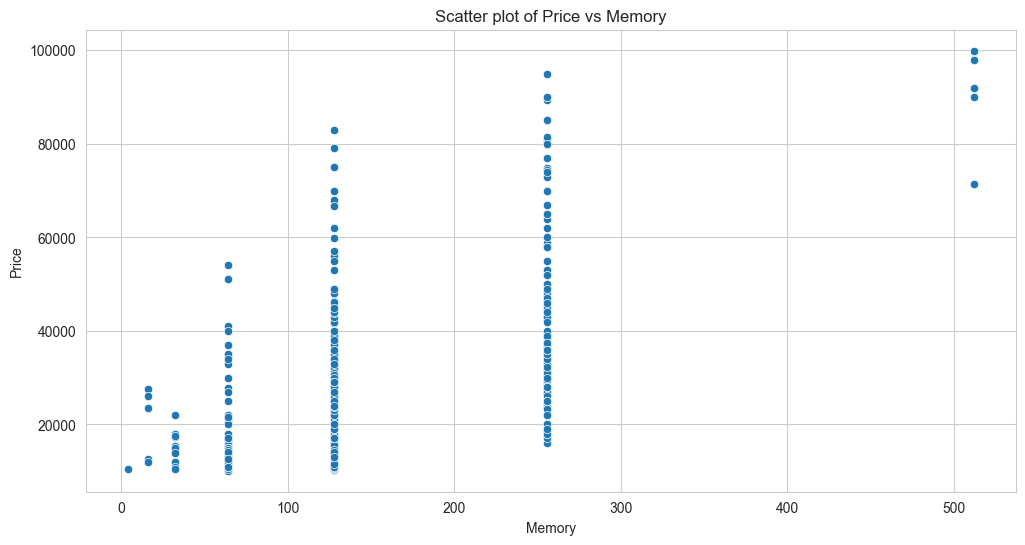

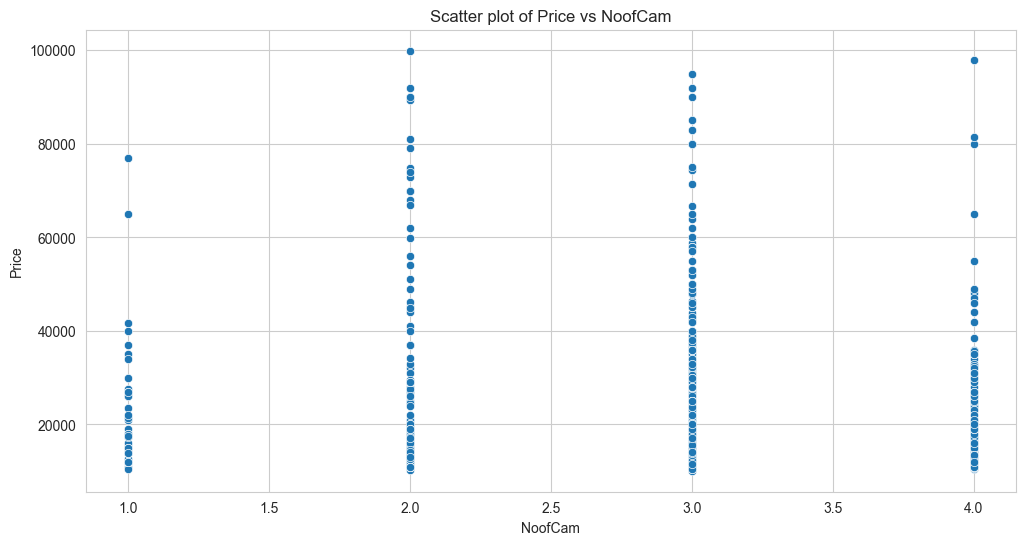

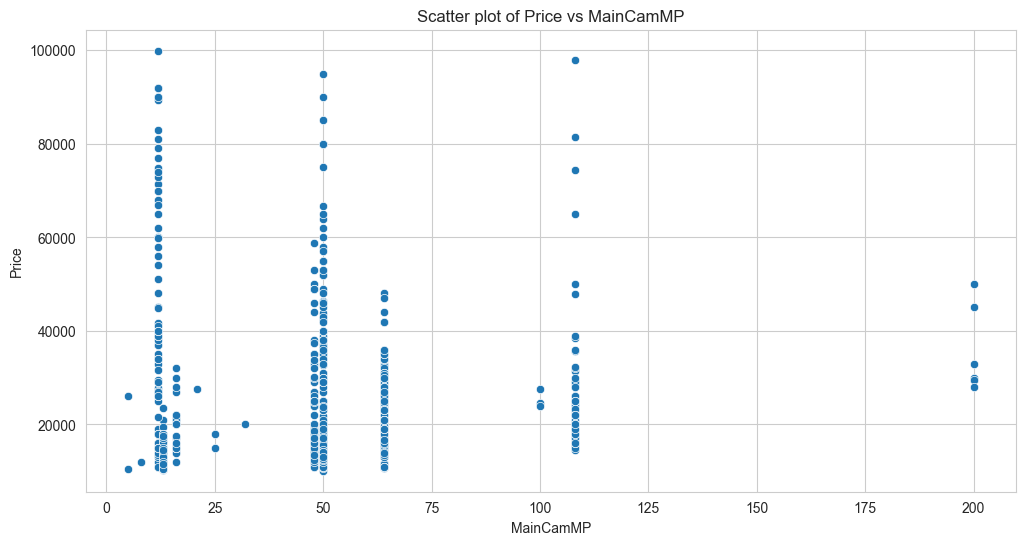

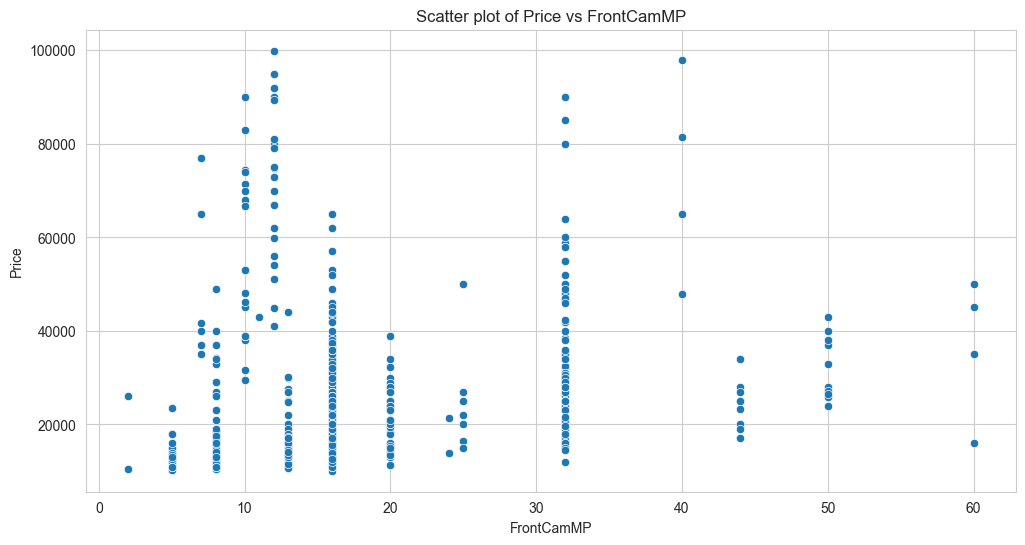

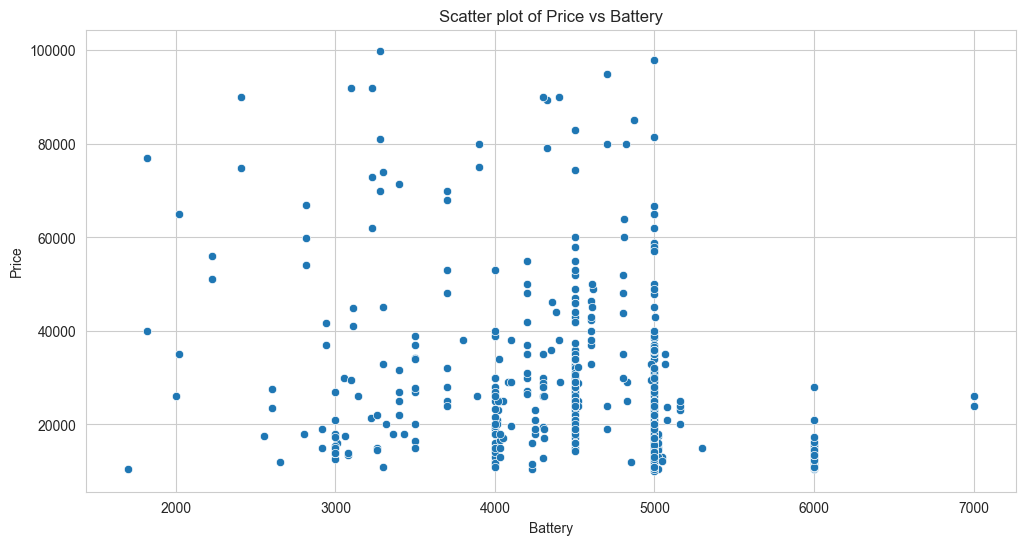

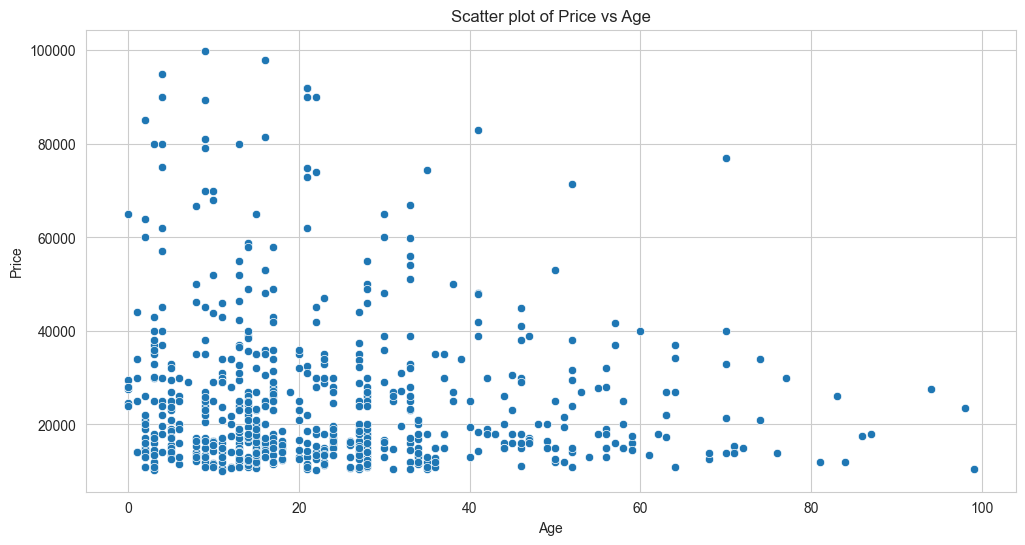

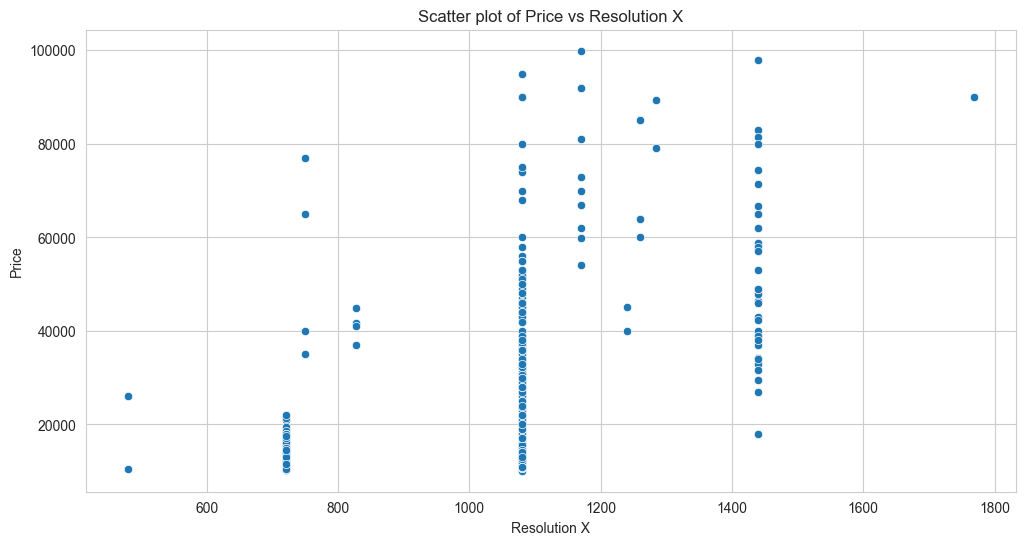

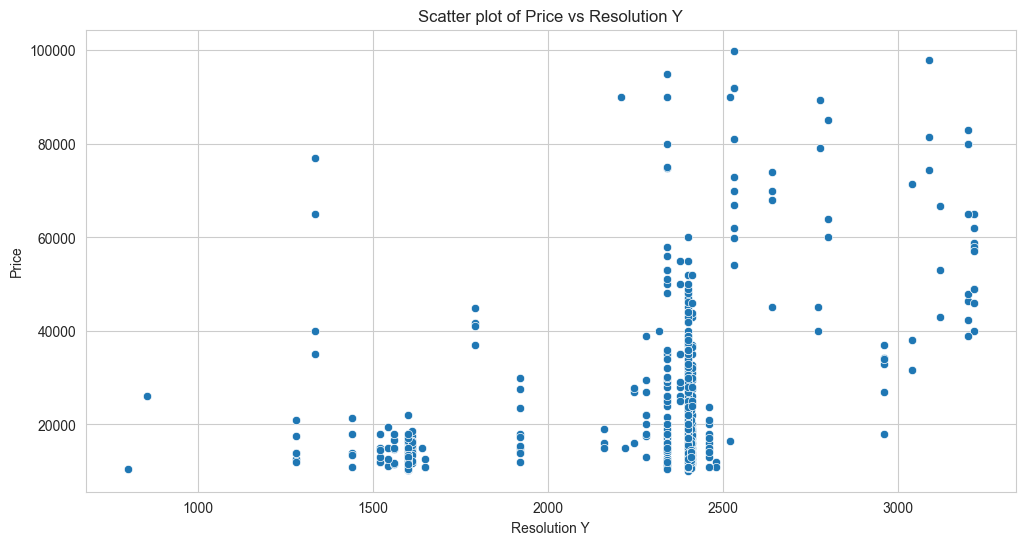

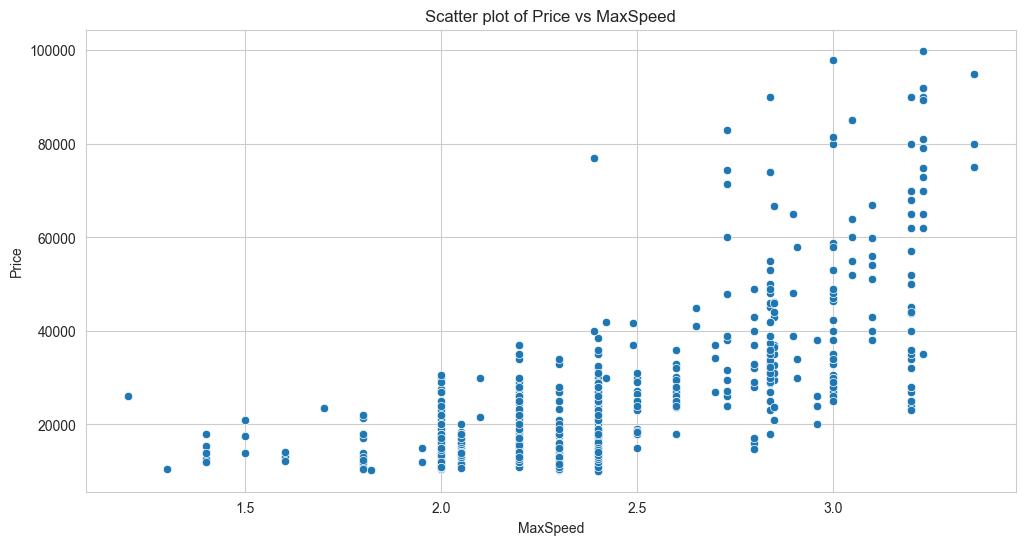

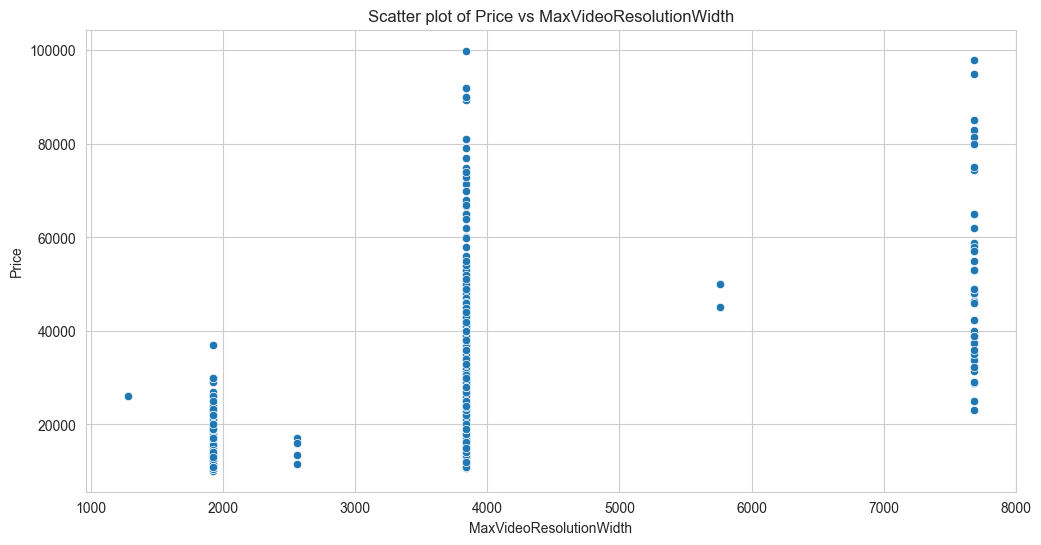

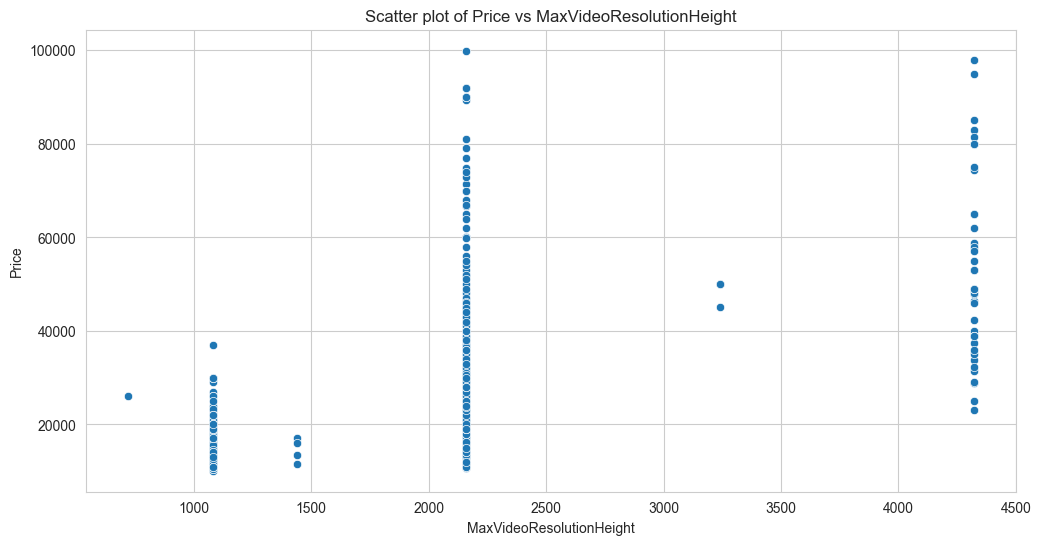

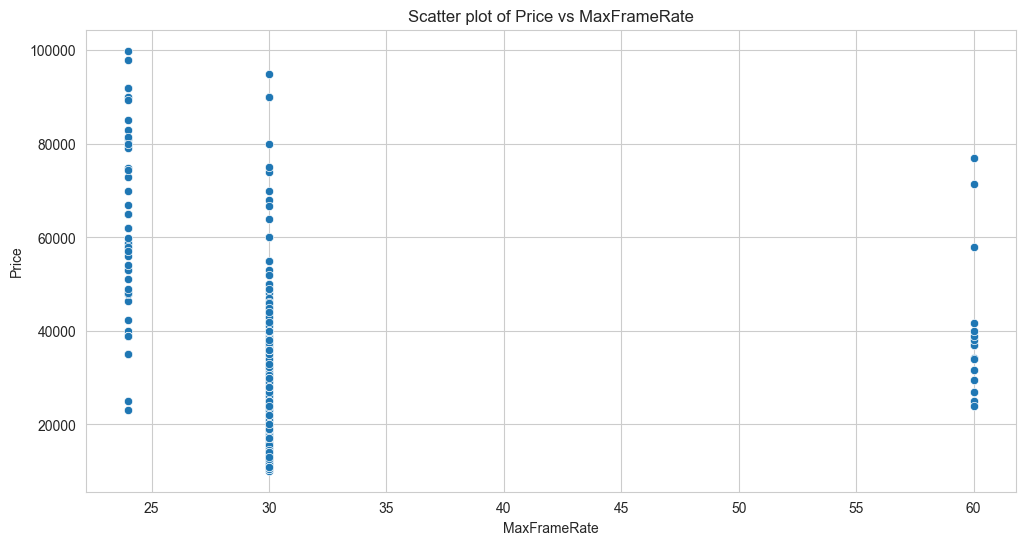

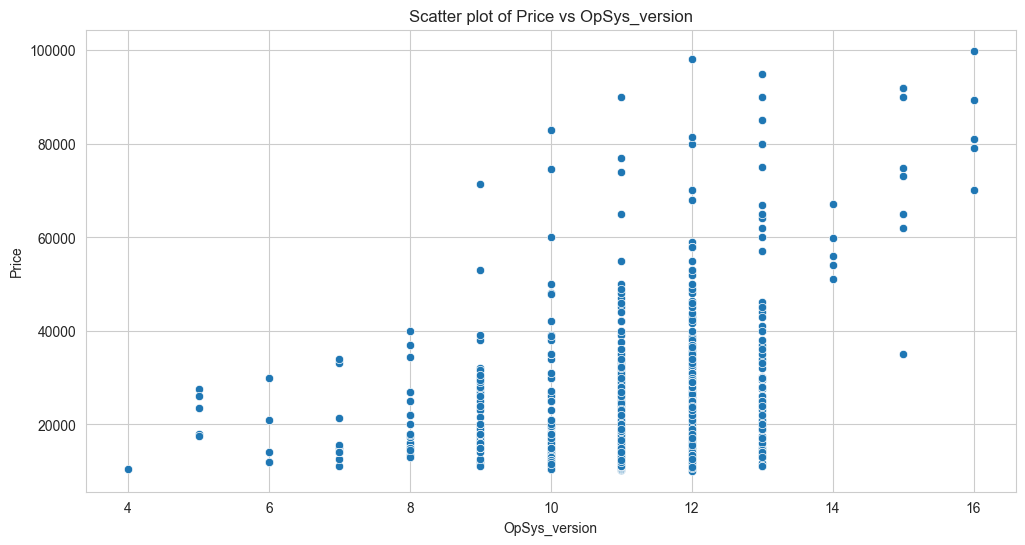

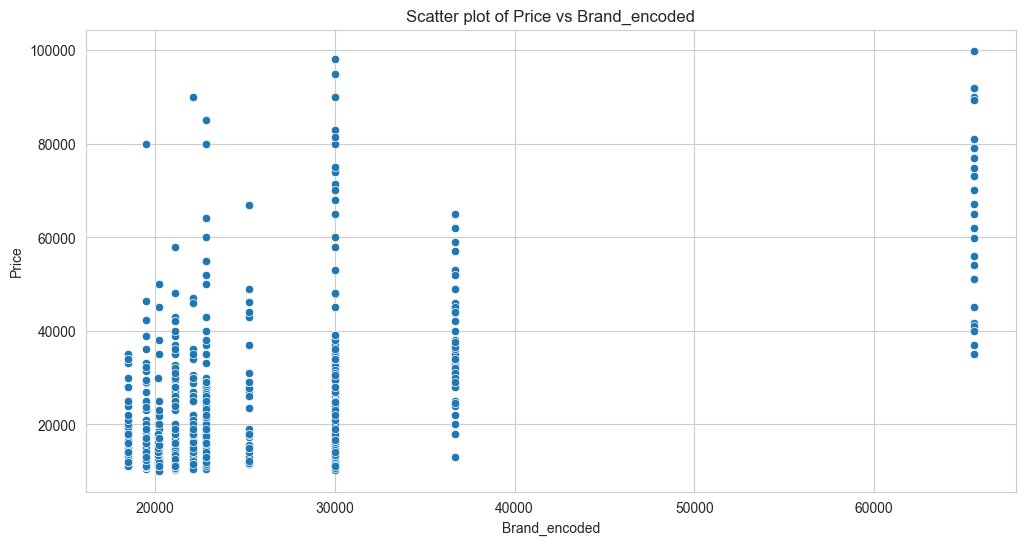

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df['OpSys_version'] = df['OpSys_version'].astype(int)
df['ScreenType_LCD'] = df['ScreenType_LCD'].astype(int)
df['ScreenType_OLED'] = df['ScreenType_OLED'].astype(int)

num_cols = ['Price', 'Weight', 'Screen Size', 'PPI', 'Refresh Rate', 'RAM', 'Memory', 'NoofCam', 
            'MainCamMP', 'FrontCamMP', 'Battery', 'Age', 'Resolution X', 'Resolution Y', 
            'MaxSpeed', 'MaxVideoResolutionWidth', 'MaxVideoResolutionHeight', 'MaxFrameRate', 
            'OpSys_version', 'Brand_encoded']

for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x=col, y='Price')
    plt.title(f'Scatter plot of Price vs {col}')
    plt.show()

In this code cell, we are creating a correlation matrix and a heatmap to visualize the correlations between the variables in our dataset. 

1. **Compute the correlation matrix:** We use the `corr()` function to compute the correlation matrix of our dataframe. This matrix shows the Pearson correlation coefficient between each pair of variables. The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables, ranging from -1 to 1. A value of 1 means a perfect positive correlation, -1 means a perfect negative correlation, and 0 means no correlation.

2. **Print the correlation matrix:** We print the correlation matrix to the console for inspection. This allows us to see the numerical correlation coefficients between all pairs of variables.

3. **Generate a mask for the upper triangle:** Since the correlation matrix is symmetric, the upper triangle (or lower triangle) is a mirror image of the lower triangle (or upper triangle). To avoid redundancy and make the heatmap easier to read, we create a mask to hide the upper triangle of the heatmap.

4. **Set up the matplotlib figure:** We set up the figure where the heatmap will be drawn, specifying the size of the figure.

5. **Generate a custom diverging colormap:** We create a custom colormap for the heatmap using the `diverging_palette()` function from seaborn. This creates a palette of colors that diverge from a light color to two different darker colors, which is useful for visualizing data that has a clear midpoint.

6. **Draw the heatmap:** We use the `heatmap()` function from seaborn to draw the heatmap. We pass in the correlation matrix, the mask for the upper triangle, the custom colormap, and other parameters to customize the appearance of the heatmap.

The resulting heatmap provides a visual representation of the correlations between variables. Darker colors represent stronger correlations. This can help us identify variables that are strongly correlated with the target variable, as well as multicollinearity (strong correlations between predictor variables).


                             Price    Weight  Screen Size       PPI   
Price                     1.000000  0.011240    -0.036386  0.470658  \
Weight                    0.011240  1.000000     0.695269 -0.004416   
Screen Size              -0.036386  0.695269     1.000000  0.119429   
PPI                       0.470658 -0.004416     0.119429  1.000000   
Refresh Rate              0.332151  0.276152     0.346993  0.341513   
RAM                       0.474478  0.230315     0.415315  0.437912   
Memory                    0.653058  0.113831     0.195620  0.370452   
NoofCam                  -0.051493  0.442788     0.494164  0.104551   
MainCamMP                -0.016112  0.304651     0.446988  0.175378   
FrontCamMP                0.242973  0.013822     0.215027  0.274077   
Battery                  -0.359966  0.694896     0.723319 -0.131436   
Wireless Ch               0.678673 -0.090034    -0.245519  0.390543   
Fast Charging             0.183179  0.276235     0.361845  0.429108   
Finger

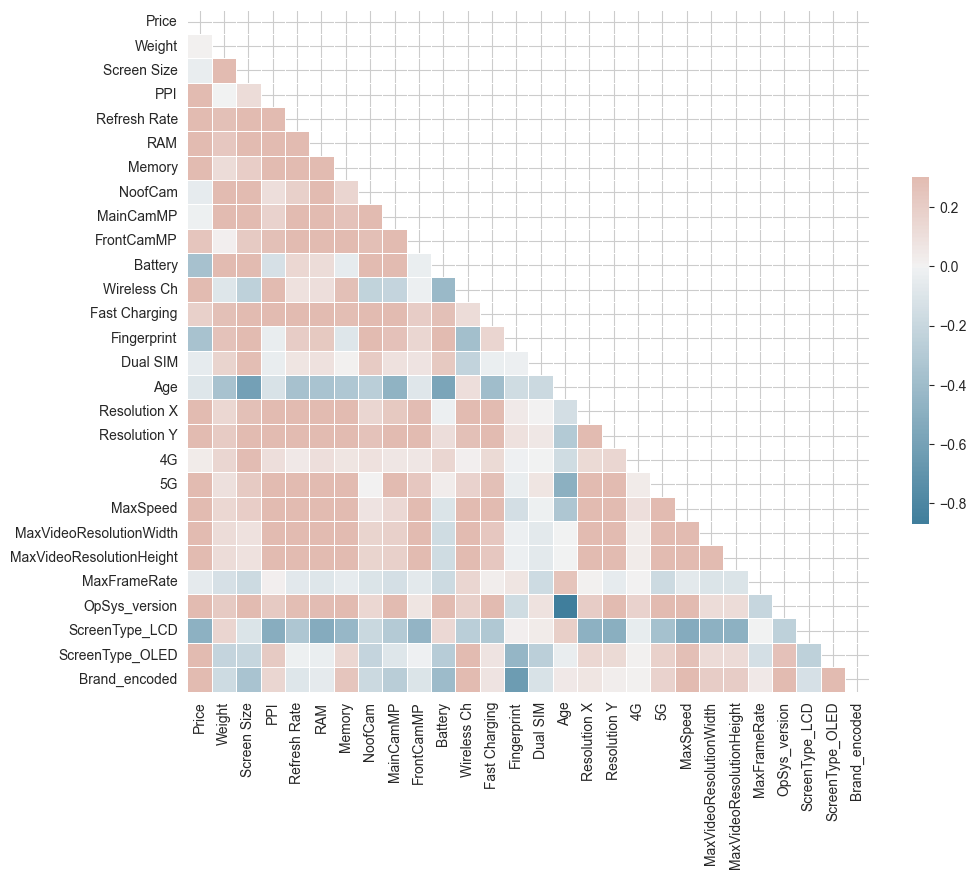

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

print(corr_matrix)

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In this code cell, we are calculating and printing the skewness, kurtosis, whether the distribution is normal or not, unique values, and value counts for each column in our dataframe. 

1. **Skewness:** Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined. For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right.

2. **Kurtosis:** Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.

3. **Normal distribution:** A normal distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is symmetric, and its mean, median and mode are equal. Here, we are checking if the skewness and kurtosis of the distribution are within the range of -3 to 3, which is a general rule of thumb for normality.

4. **Unique values:** We are printing the unique values in each column to understand the diversity of our data.

5. **Value counts:** We are printing the count of each unique value in each column to understand the distribution of our data.

This information will help us understand the distribution of our data and identify any potential issues that might need to be addressed before modeling, such as skewness or outliers.


In [19]:
# print the distribution numerically for all columns with all values to study the distribution along with skewness and kurtosis and wether it is normal or not
for col in df.columns:
    print(f"Skewness of {col}: {df[col].skew()}")
    print(f"Kurtosis of {col}: {df[col].kurtosis()}")
    print(f"Normal distribution of {col}: {df[col].kurtosis() < 3 and df[col].skew() < 3 and df[col].skew() > -3}")
    print(f"Unique values in {col}: {df[col].unique()}")
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Skewness of Price: 2.072513783836758
Kurtosis of Price: 4.549737789363876
Normal distribution of Price: False
Unique values in Price: [13990 14990 10758 13999 17999 10999 18390 91999 23499 18000 41999 15990
 11999 34000 12499 27590 10500 15000 18999 12000 17200 14999 15499 89999
 64900 21000 31999 12990 26999 16490 11189 18450 11499 13499 59999 11699
 10294 36999 15999 19999 74900 22999 31480 77000 26990 15465 14690 34999
 14499 12999 25999 29999 19499 27000 27990 24990 10499 12489 24999 13899
 30000 71400 15490 16499 10199 16599 17271 41699 19994 14899 13000 38959
 47999 55999 12649 51990 27779 16799 15495 18619 16990 21300 17990 25000
 52999 34990 27994 16249 10990 19990 42999 14180 14299 21990 11485 29990
 16999 10400 14209 72999 15480 27249 13090 27999 15998 52990 29600 16294
 12500 21699 29000 19600 33000 16699 11680 32999 63999 12900 49999 17494
 28799 19500 97999 17600 32499 46390 20990 27499 58889 11399 51999 18499
 22987 17499 33999 23994 23999 35090 28994 28980 11094 14994 21

In this code cell, we are performing various transformations on our data to handle outliers, skewness, and to scale the features. 

1. **Winsorizing:** Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. It is a way to minimize the influence of outliers in your data by either setting the extreme values to a specified percentile value or by setting values above a certain percentile to a specified maximum value, and setting values below a certain percentile to a specified minimum value.

2. **Log Transformation:** Log transformation is a data transformation method in which it replaces each variable x with a log(x). The choice of the logarithm base is usually left up to the analyst and it would depend on the purposes of statistical modeling. When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid.

3. **Square Transformation:** The square transformation is used when the data is left-skewed. Squaring always gives positive results and reduces the impact of extreme values.

4. **Scaling:** Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. Here, we are using the StandardScaler which standardizes features by removing the mean and scaling to unit variance.

5. **Normalization with Box-Cox:** The Box-Cox transformation is a family of power transformations indexed by a parameter lambda. Whenever you use it, you are assuming that your data are normally distributed. This method is used to stabilize variance, make the data more normal distribution-like, improve the validity of measures of association.

6. **Binary columns:** For binary columns, no transformation is needed as they are already in a form that can be easily used by machine learning algorithms.

These transformations will help us to improve the performance of our machine learning models by handling outliers, reducing skewness, and scaling the features.


In [20]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

columns = ['Price', 'Weight', 'Screen Size', 'PPI', 'Refresh Rate', 'RAM', 'Memory', 'NoofCam', 'MainCamMP', 'FrontCamMP', 'Battery', 'Age', 'Resolution X', 'Resolution Y', 'MaxSpeed', 'MaxVideoResolutionWidth', 'MaxVideoResolutionHeight', 'MaxFrameRate', 'OpSys_version', 'Brand_encoded']

for col in columns:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

right_skewed = ['Price', 'Weight', 'PPI', 'Refresh Rate', 'RAM', 'Memory', 'NoofCam', 'MainCamMP', 'FrontCamMP', 'Battery', 'Age', 'Resolution X', 'Resolution Y', 'MaxSpeed', 'MaxVideoResolutionWidth', 'MaxVideoResolutionHeight', 'MaxFrameRate']
for col in right_skewed:
    df[col] = df[col].apply(lambda x: np.log(x+1))

left_skewed = ['Screen Size']
for col in left_skewed:
    df[col] = df[col].apply(np.square)

scaler = StandardScaler()  
df[columns] = scaler.fit_transform(df[columns])

normalizer = PowerTransformer(method='box-cox')
for col in ['Price', 'Weight', 'RAM', 'Memory', 'NoofCam', 'MainCamMP', 'FrontCamMP', 'Battery', 'Age']:
    min_val = df[col].min()
    if min_val <= 0:
        df[col] = df[col] + abs(min_val) + 1  
    df[col] = normalizer.fit_transform(df[[col]])

In this code cell, we are defining a function to evaluate the performance of our machine learning models. The function `evaluate_model` takes the true and predicted values as inputs and returns the Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) score.

1. **Mean Squared Error (MSE):** It is the average of the square of the errors. The larger the number the larger the error.

2. **Mean Absolute Error (MAE):** It is the average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions were.

3. **R-squared (R2):** It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. If the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

We then test this function with some example data to ensure it's working correctly.


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Test the function with some example data
y_true_example = [3, -0.5, 2, 7]
y_pred_example = [2.5, 0.0, 2, 8]
mse_example, mae_example, r2_example = evaluate_model(y_true_example, y_pred_example)

print(f"Mean Squared Error: {mse_example}")
print(f"Mean Absolute Error: {mae_example}")
print(f"R-squared: {r2_example}")


Mean Squared Error: 0.375
Mean Absolute Error: 0.5
R-squared: 0.9486081370449679


In this code cell, we are splitting the dataset into a training set and a test set. We are using the `StratifiedShuffleSplit` method from `sklearn.model_selection` to ensure that the training and test sets have similar distributions of outliers.

1. **Calculate the Interquartile Range (IQR):** The IQR is a measure of statistical dispersion, being equal to the difference between the upper and lower quartiles. IQR = Q3 - Q1. In other words, the IQR is the first quartile subtracted from the third quartile.

2. **Define a threshold for what constitutes an outlier:** Any data point that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.

3. **Create a binary variable indicating whether each data point is an outlier:** We create a new variable `is_outlier` that is `True` for each data point that is an outlier and `False` otherwise.

4. **Initialize the StratifiedShuffleSplit object:** We initialize a `StratifiedShuffleSplit` object with `n_splits=1`, `test_size=0.2`, and `random_state=42` to ensure reproducibility.

5. **Perform the split:** We use the `split` method of the `StratifiedShuffleSplit` object to split the dataset into a training set and a test set. The `split` method takes the dataset and the `is_outlier` variable as inputs and returns indices for the training and test sets. We use these indices to create the training and test sets.


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

# Calculate the IQR of your data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for what constitutes an outlier
threshold = 1.5

# Create a binary variable indicating whether each data point is an outlier
is_outlier = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in sss.split(df, is_outlier):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]


In this code cell, we are training and evaluating several regression models to predict the price of a mobile phone. We are using the `RandomizedSearchCV` method from `sklearn.model_selection` to perform hyperparameter tuning for each model.

1. **Define the models and their respective hyperparameters:** We define a dictionary where the keys are the names of the models and the values are tuples containing the model and a dictionary of hyperparameters to tune.

2. **Initialize a dictionary to hold the best models:** We create an empty dictionary `best_models` to store the best model for each type of regressor.

3. **Split the data into features and target variable:** We separate the `Price` column (our target variable) from the rest of the dataset for both the training and test sets.

4. **Train each model and perform hyperparameter tuning:** For each model, we initialize a `RandomizedSearchCV` object with the model and its hyperparameters. We fit this object to the training data, which trains the model and performs hyperparameter tuning. We then save the best model (i.e., the model with the best hyperparameters) in the `best_models` dictionary.

5. **Evaluate each model:** For each model, we make predictions on the test data and calculate the Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) metrics. We print these metrics for each model.

6. **Create a DataFrame of the results:** We create a DataFrame that contains the MSE, MAE, and R2 for each model.

7. **Visualize the results:** We create bar plots of the MSE, MAE, and R2 for each model. This allows us to easily compare the performance of the different models.

By running this code cell, we can determine which model performs the best on our data and should therefore be used for making predictions.


C:\Users\Shreyansh Rai\AppData\Roaming\Python\Python310\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Training Linear Regression...


C:\Users\Shreyansh Rai\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Linear Regression Metrics:
Mean Squared Error (MSE): 0.15026370929542557
Root Mean Squared Error (RMSE): 0.38763863235676804
Mean Absolute Error (MAE): 0.3063758844216364
R-squared (R2 ): 0.848260700020663


Training SVR...
SVR Metrics:
Mean Squared Error (MSE): 0.12715001119608038
Root Mean Squared Error (RMSE): 0.35658100229271944
Mean Absolute Error (MAE): 0.27115189773595727
R-squared (R2 ): 0.8716013747981832


Training Decision Tree...
Decision Tree Metrics:
Mean Squared Error (MSE): 0.16513624610667577
Root Mean Squared Error (RMSE): 0.4063695929897755
Mean Absolute Error (MAE): 0.3110787453983
R-squared (R2 ): 0.833242114793147


Training Random Forest...
Random Forest Metrics:
Mean Squared Error (MSE): 0.14760986537194593
Root Mean Squared Error (RMSE): 0.38420029330018207
Mean Absolute Error (MAE): 0.28715151432533187
R-squared (R2 ): 0.850940604710168


Training Gradient Boosting...
Gradient Boosting Metrics:
Mean Squared Error (MSE): 0.11845282762364845
Root Mean Squared Er

C:\Users\Shreyansh Rai\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
11 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shreyansh Rai\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python310\lib\site-packages\catboost\core.py", line 5734, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "c:\Python310\lib\site-packages\catboost\

0:	learn: 0.9843552	total: 134ms	remaining: 3m 18s
1:	learn: 0.9693163	total: 134ms	remaining: 1m 39s
2:	learn: 0.9549319	total: 135ms	remaining: 1m 6s
3:	learn: 0.9395127	total: 136ms	remaining: 50.2s
4:	learn: 0.9260423	total: 136ms	remaining: 40.3s
5:	learn: 0.9108647	total: 137ms	remaining: 33.7s
6:	learn: 0.8972183	total: 137ms	remaining: 29s
7:	learn: 0.8835782	total: 138ms	remaining: 25.5s
8:	learn: 0.8697664	total: 139ms	remaining: 22.7s
9:	learn: 0.8561126	total: 139ms	remaining: 20.6s
10:	learn: 0.8423375	total: 140ms	remaining: 18.8s
11:	learn: 0.8294126	total: 140ms	remaining: 17.2s
12:	learn: 0.8175582	total: 141ms	remaining: 16s
13:	learn: 0.8064822	total: 142ms	remaining: 14.9s
14:	learn: 0.7950776	total: 142ms	remaining: 13.9s
15:	learn: 0.7828596	total: 143ms	remaining: 13.1s
16:	learn: 0.7714588	total: 143ms	remaining: 12.4s
17:	learn: 0.7623740	total: 144ms	remaining: 11.7s
18:	learn: 0.7509306	total: 145ms	remaining: 11.2s
19:	learn: 0.7403588	total: 145ms	remaining

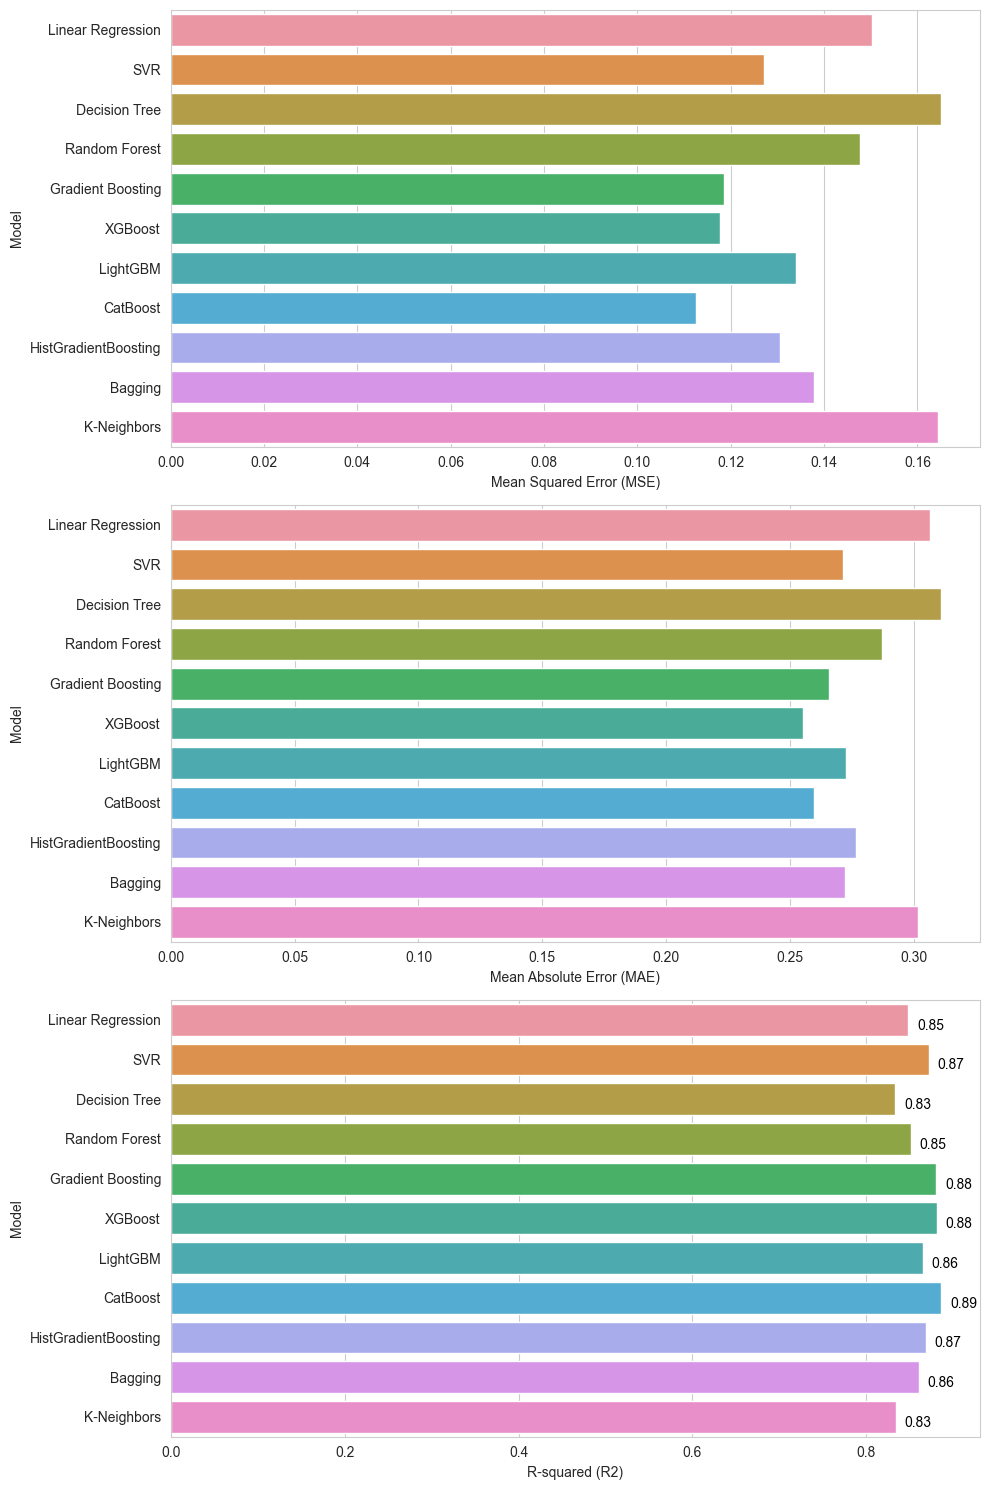

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Define the models and their respective hyperparameters
models = {
    'Linear Regression': (LinearRegression(), {}),
    'SVR': (SVR(), {'C': sp_uniform(0.1, 10), 'epsilon': sp_uniform(0.01, 0.1), 'gamma': ['scale', 'auto']}),
    'Decision Tree': (DecisionTreeRegressor(), {'max_depth': sp_randint(3, 20), 'min_samples_split': sp_randint(2, 11), 'min_samples_leaf': sp_randint(1, 11)}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': sp_randint(50, 200), 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': sp_randint(3, 20), 'min_samples_split': sp_randint(2, 11), 'min_samples_leaf': sp_randint(1, 11)}),
    'Gradient Boosting': (GradientBoostingRegressor(), {'n_estimators': sp_randint(50, 200), 'learning_rate': sp_uniform(0.01, 0.1), 'max_depth': sp_randint(3, 20), 'min_samples_split': sp_randint(2, 11), 'min_samples_leaf': sp_randint(1, 11)}),
    'XGBoost': (XGBRegressor(), {'n_estimators': sp_randint(50, 200), 'learning_rate': sp_uniform(0.01, 0.1), 'max_depth': sp_randint(3, 20), 'min_child_weight': sp_randint(1, 6), 'gamma': sp_uniform(0, 0.5), 'subsample': sp_uniform(0.5, 0.5)}),
    'LightGBM': (LGBMRegressor(), {'n_estimators': sp_randint(50, 200), 'learning_rate': sp_uniform(0.01, 0.1), 'max_depth': sp_randint(3, 20), 'num_leaves': sp_randint(20, 100), 'min_data_in_leaf': sp_randint(10, 100)}),
    'CatBoost': (CatBoostRegressor(), {'iterations': sp_randint(500, 2000), 'learning_rate': sp_uniform(0.01, 0.1), 'depth': sp_randint(4, 10), 'l2_leaf_reg': sp_randint(1, 5)}),
    'HistGradientBoosting': (HistGradientBoostingRegressor(), {'max_iter': sp_randint(200, 500), 'learning_rate': sp_uniform(0.01, 0.1), 'max_depth': sp_randint(3, 20), 'min_samples_leaf': sp_randint(10, 50), 'l2_regularization': sp_uniform(0, 1)}),
    'Bagging': (BaggingRegressor(), {'n_estimators': sp_randint(50, 200), 'max_samples': sp_uniform(0.5, 0.5), 'max_features': sp_uniform(0.5, 0.5)}),
    'K-Neighbors': (KNeighborsRegressor(), {'n_neighbors': sp_randint(1, 20), 'weights': ['uniform', 'distance'], 'p': [1, 2]})
}



# Initialize a dictionary to hold the best models
best_models = {}

y_test = test_set['Price']
X_test = test_set.drop('Price', axis=1)

y_train = train_set['Price']
X_train = train_set.drop('Price', axis=1)


# For each model
for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    
    # Perform hyperparameter tuning
    clf = RandomizedSearchCV(model, params, n_iter=50, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    # Save the best model
    best_models[model_name] = clf.best_estimator_
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the metrics
    print(f"{model_name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2 ): {r2}")
    print("\n")

# Create lists to hold model names and their metrics
model_names = []
mses = []
maes = []
r2s = []

# For each model
for model_name, model in best_models.items():
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the metrics to the lists
    model_names.append(model_name)
    mses.append(mse)
    maes.append(mae)
    r2s.append(r2)

# Create a DataFrame from the lists
results = pd.DataFrame({'Model': model_names, 'MSE': mses, 'MAE': maes, 'R2': r2s})

# Create a figure and axes
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Create bar plots
sns.barplot(x='MSE', y='Model', data=results, ax=ax[0])
sns.barplot(x='MAE', y='Model', data=results, ax=ax[1])
bar_plot = sns.barplot(x='R2', y='Model', data=results, ax=ax[2])

# Set the labels
ax[0].set_xlabel('Mean Squared Error (MSE)')
ax[1].set_xlabel('Mean Absolute Error (MAE)')
ax[2].set_xlabel('R-squared (R2)')

# Add the R2 scores on the bar plot
for i, v in enumerate(results['R2']):
    ax[2].text(v + 0.01, i + .25, str(round(v, 2)), color='black')

# Show the plot
plt.tight_layout()
plt.show()


In this code cell, we are plotting the learning curves for each of our best models. A learning curve is a plot of the training and validation scores of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

1. **Define a function to plot learning curves:** We define a function `plot_learning_curve` that takes an estimator, a title for the plot, the features and target variable, and other optional parameters. This function plots the learning curve for the given estimator.

2. **Create a scorer:** We create a scorer using the `make_scorer` function from `sklearn.metrics`. This scorer calculates the mean squared error, and we specify `greater_is_better=False` because a lower mean squared error is better.

3. **Calculate the training and test scores:** We use the `learning_curve` function from `sklearn.model_selection` to calculate the training and test scores for different numbers of training examples.

4. **Calculate the mean and standard deviation of the scores:** We calculate the mean and standard deviation of the training and test scores across the different folds of cross-validation.

5. **Plot the learning curves:** We plot the mean training and test scores against the number of training examples. We also fill the area between the mean score and one standard deviation above and below the mean score.

6. **Plot learning curves for each model:** For each of our best models, we plot the learning curve. We only plot the learning curves for the models that are not too computationally expensive.

By looking at these learning curves, we can get an idea of how each model's performance improves as we add more training data. This can help us decide whether collecting more data could improve our model's performance.


[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 41, number of used features: 0
[LightGBM] [Info] Start training from score 0.130343
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that m

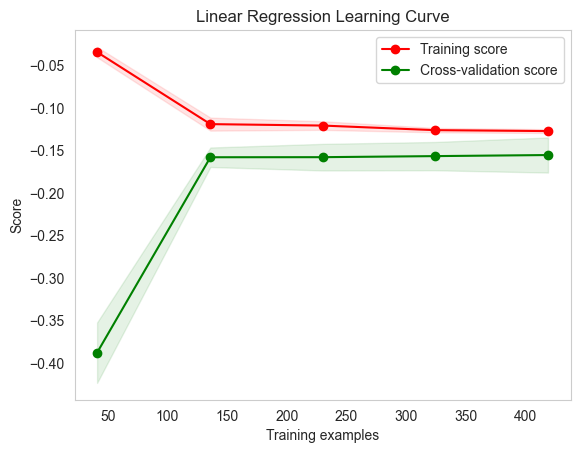

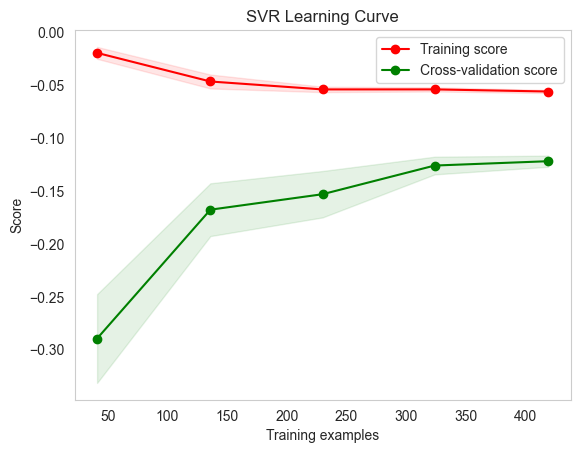

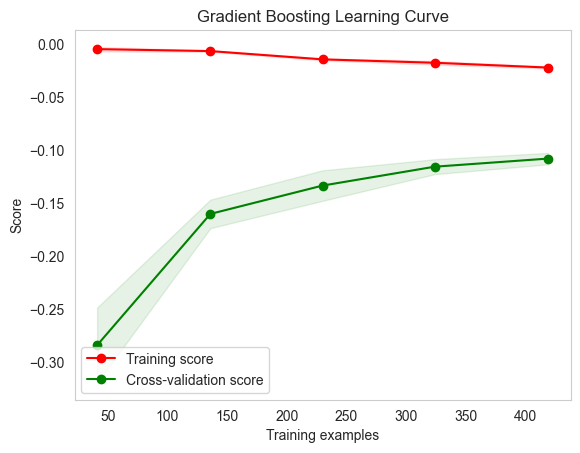

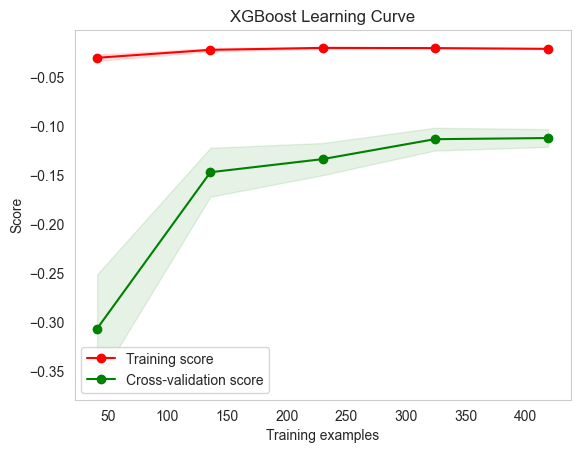

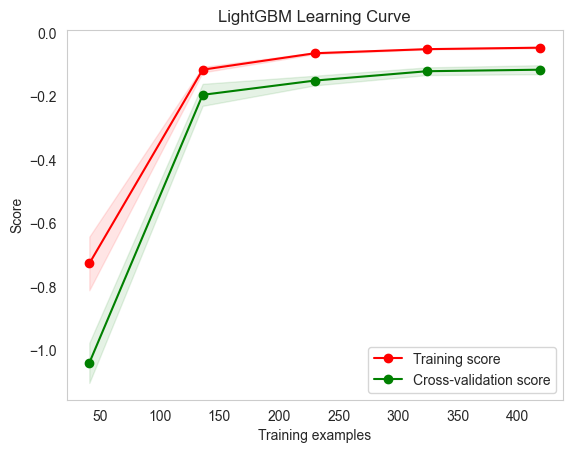

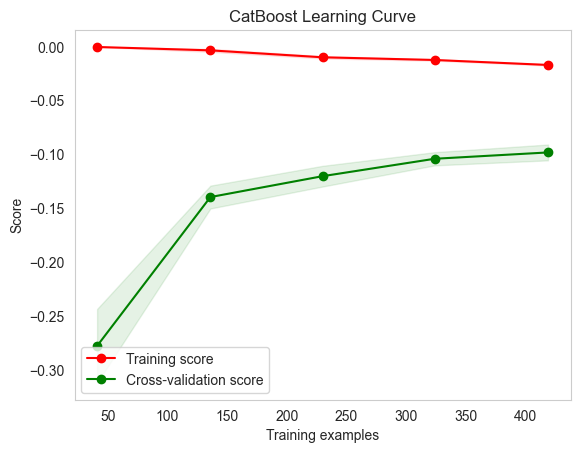

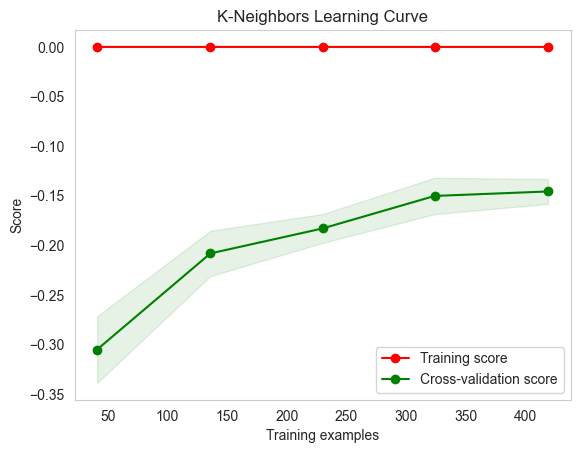

In [24]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_error

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scorer, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# For each model
for model_name, model in best_models.items():
    if model_name in ['Linear Regression', 'K-Neighbors', 'SVR', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'LightGBM']:
        plot_learning_curve(model, f"{model_name} Learning Curve", X_train, y_train, cv=5)
plt.show()
